# Global Power Plant Database Project (Evaluation Project - 4)

Problem Statement:-

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type A

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

# Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Downlaod Files:
    


https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

# Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.preprocessing import PowerTransformer,StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

# Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor

# Classification models

from  sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

# Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score


# Importing Dataset

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking shape of Dataset
df.shape


(907, 27)

Observation:
 
Dataset has 907 rows and 27 columns.


In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Checking Columns names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Observation:
    
There are 10 float values and 11 are object types.

There are two target variable , primary_fuel and capacity_mw.

There is no null value in dataset.

country ,country_long, name, gppd_idnr, primary_fuel, source, url are object datatypes.

primary_fuel is a categorical data, needs classification model to predict.

capacity_mw is a categorical data, needs regression model to predict.

# Checking Null Values 

In [9]:
# Checking Null values
null_val= df.isna().sum()
null_val_per =(null_val/df.shape[0])*100
N= [null_val, null_val_per]
print("Null value details \n\n", pd.concat(N, axis =1, keys =['Null Values', 'N_Val percentage']).sort_values('Null Values'))


Null value details 

                           Null Values  N_Val percentage
country                             0          0.000000
url                                 0          0.000000
primary_fuel                        0          0.000000
capacity_mw                         0          0.000000
source                              0          0.000000
gppd_idnr                           0          0.000000
name                                0          0.000000
country_long                        0          0.000000
geolocation_source                 19          2.094818
latitude                           46          5.071665
longitude                          46          5.071665
commissioning_year                380         41.896362
year_of_capacity_data             388         42.778390
generation_data_source            458         50.496141
generation_gwh_2018               459         50.606395
generation_gwh_2017               467         51.488423
generation_gwh_2016       

<AxesSubplot:>

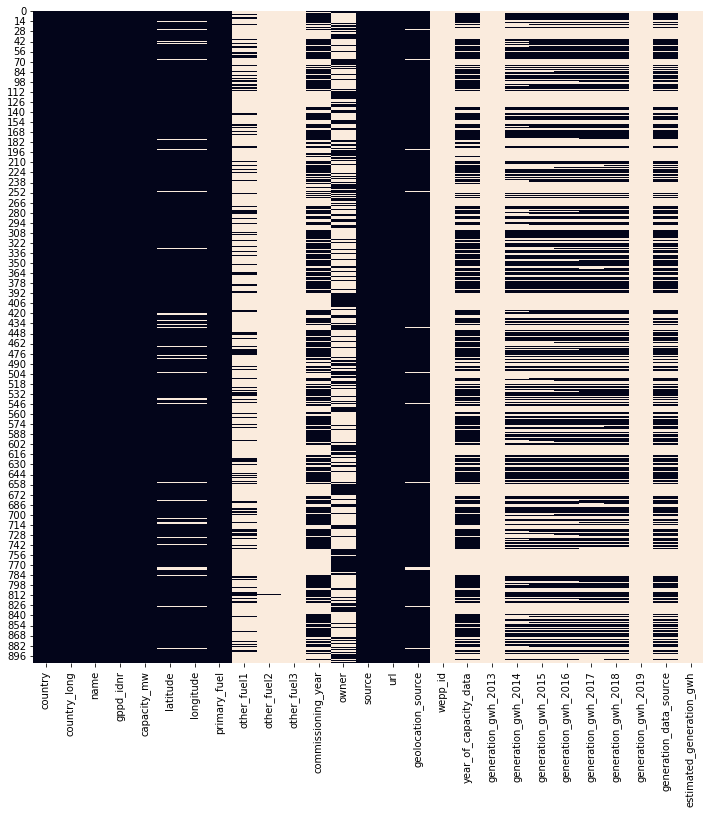

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(),cbar=False)


Observations:
    
There are a lot number of misisng values in the data set, Lattitude, Longitude have 46 missing values,other_fuel has nearly 90% of missing values in column ,generation_gwh data has 50% of missing values

Country and country long has 1 unique value which has no inference on Analysis.

gppd_idnr indicates unique id for power plant, hence not required

url of powerplant is website required to contact the company which has no use in prediction.

'generation_data_source' has only 1 value and other is NaN, so instead of replacing missing values it is good to remove the column.

'year_of_capacity_data','other_fuel2' has 1 value and 'other_fuel3, 'wepp_id', 'estimated_generation_gwh' has only null values.

These above attributes can be directly removed from data set.

In [11]:
df.drop(['other_fuel3', 'generation_gwh_2019', 'generation_gwh_2013', 'wepp_id', 
           'estimated_generation_gwh', 'other_fuel2'],axis=1,inplace= True)
df.shape

(907, 21)

In [12]:
# Checking unique values in dataset

df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

Observation:
    
country, year_of_capacity_data,generation_data_source and country_long has only one unique value i.e. no need to keep this information further.

In [13]:
df.drop(['country', 'country_long', 'year_of_capacity_data','generation_data_source'],axis=1,inplace= True)
df.shape

(907, 17)

# Imputing features

In [14]:
# Imputing Geolocation_Source

df["geolocation_source"].mode()

0    WRI
Name: geolocation_source, dtype: object

In [15]:
df["geolocation_source"].fillna("WRI", inplace=True)

In [16]:
df["geolocation_source"].isna().sum()

0

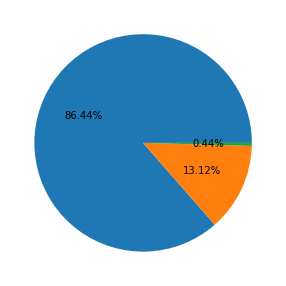

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(df['geolocation_source'].value_counts(), autopct='%1.2f%%')
plt.show()

Observation: There is no null value present in geolocation_source.

Text(0, 0.5, 'latitude')

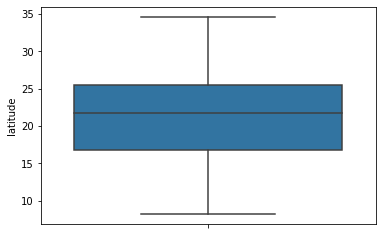

In [18]:
# Imputing Longitude and Latitude

sns.boxplot( y='latitude', data=df)
plt.ylabel('latitude')

Observation: Imputing the null values with mean.No outliers present in it.

Text(0, 0.5, 'longitude')

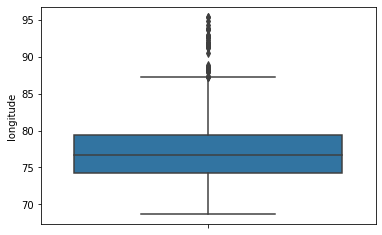

In [19]:
sns.boxplot( y='longitude', data=df)
plt.ylabel('longitude')

Observation: Imputing null values with median.Outliers present in it.

In [20]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
print (df["latitude"].isna().sum())
print (df["longitude"].isna().sum())


0
0


In [21]:
# Commissioning Year

df["commissioning_year"].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

Observation: Commissioning Year has no relation with Global power Plant ,its just year of establishment.To make it useful we need to convert it. 

In [22]:
df['age'] = 2022 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

Text(0, 0.5, 'age')

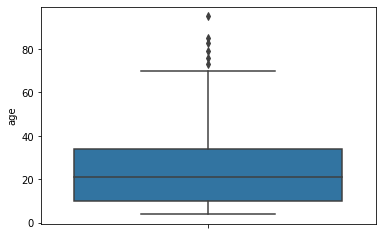

In [23]:
sns.boxplot( y='age', data=df)
plt.ylabel('age')

Imputing Age with Mean.

In [24]:
df['age'] = df['age'].fillna(df['age'].mean())
df["age"].isna().sum()

0

# Again Checking Null Values

In [25]:
null_val= df.isna().sum()
null_val_per =(null_val/df.shape[0])*100
l= [null_val, null_val_per]
print("missing values \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values %']).sort_values('Null Values'))


missing values 

                      Null Values  Null Values %
name                           0       0.000000
geolocation_source             0       0.000000
url                            0       0.000000
primary_fuel                   0       0.000000
source                         0       0.000000
latitude                       0       0.000000
capacity_mw                    0       0.000000
gppd_idnr                      0       0.000000
longitude                      0       0.000000
age                            0       0.000000
generation_gwh_2018          459      50.606395
generation_gwh_2017          467      51.488423
generation_gwh_2016          473      52.149945
generation_gwh_2015          485      53.472988
generation_gwh_2014          509      56.119074
owner                        565      62.293275
other_fuel1                  709      78.169791


Observation: Still there are missing values in few columns.
name, gppd_idnr, primary_fuel, source, url are categorical values.

# Dealing with Categorical Features

In [26]:
df["name"].head()

0            ACME Solar Tower
1         ADITYA CEMENT WORKS
2    AES Saurashtra Windfarms
3                 AGARTALA GT
4                AKALTARA TPP
Name: name, dtype: object

In [27]:
df["name"].nunique()

907

In [28]:
df["gppd_idnr"].head()

0    WRI1020239
1    WRI1019881
2    WRI1026669
3    IND0000001
4    IND0000002
Name: gppd_idnr, dtype: object

In [29]:
df["gppd_idnr"].nunique()

907

In [30]:
df["source"].head()

0    National Renewable Energy Laboratory
1                    Ultratech Cement ltd
2                                     CDM
3           Central Electricity Authority
4           Central Electricity Authority
Name: source, dtype: object

In [31]:
df["source"].nunique()

191

In [32]:

df["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [33]:
df["url"].head()

0    http://www.nrel.gov/csp/solarpaces/project_det...
1                      http://www.ultratechcement.com/
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3                               http://www.cea.nic.in/
4                               http://www.cea.nic.in/
Name: url, dtype: object

In [34]:
df["url"].nunique()

304

In [35]:
df["owner"].head()

0             Solar Paces
1    Ultratech Cement ltd
2                     AES
3                     NaN
4                     NaN
Name: owner, dtype: object

In [36]:
df["owner"].nunique()

280

Observation: We can remove name, gppd_idnr, source, url columns as they donot make any count in analysis.
    Mostly coal and hydro is primary fuel.

In [37]:
df.drop(['gppd_idnr', 'url', 'owner', 'name'], axis=1, inplace= True)


In [38]:
df["source"].head()

0    National Renewable Energy Laboratory
1                    Ultratech Cement ltd
2                                     CDM
3           Central Electricity Authority
4           Central Electricity Authority
Name: source, dtype: object

In [39]:
df["source"].nunique()

191

In [40]:
df["geolocation_source"].head()

0    National Renewable Energy Laboratory
1                                     WRI
2                                     WRI
3                                     WRI
4                                     WRI
Name: geolocation_source, dtype: object

In [41]:
df["geolocation_source"].nunique()

3

In [42]:
df["other_fuel1"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    Oil
Name: other_fuel1, dtype: object

In [43]:
df["other_fuel1"].nunique()

3

# Checking Duplicates

In [44]:
df.duplicated().sum()

1

There is duplicate row in dataset,removing it.

In [45]:
df.drop_duplicates(keep= 'first',inplace= True )

In [46]:
df.shape

(906, 13)

# Statistical summary

In [47]:
# Checking statistics of dataset

df.describe()


,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
count,906.000000,906.000000,906.000000,398.000000,422.000000,434.000000,440.000000,448.000000,906.000000
mean,326.558991,21.197918,77.427884,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,24.908918
std,590.324956,6.082506,4.817675,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,13.023550
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.612500,17.065350,74.387550,223.557672,176.381063,188.285252,177.874930,193.378250,19.000000
50%,59.600000,21.292250,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,24.908918
75%,386.625000,25.178075,79.207350,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,24.908918
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,95.000000


Observation:-

Still there  are Null values in dataset and
Outliers are present in generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, capacity_mw and age.

# Exploratory Data Analysis

 Analyzing Primary Fuel (Target)

In [48]:

df["primary_fuel"].value_counts()



Coal       258
Hydro      251
Solar      127
Wind       122
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

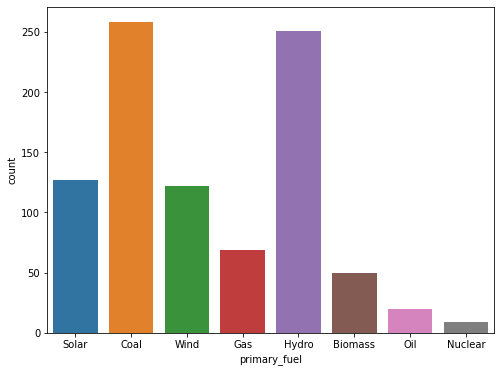

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(df['primary_fuel'])
plt.show()


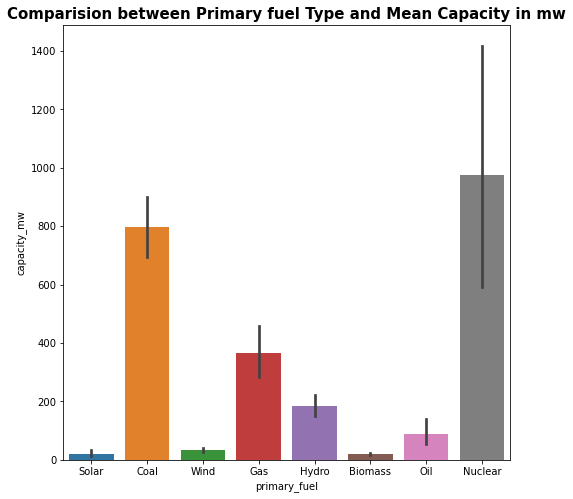

In [50]:
plt.figure(figsize=(8,8))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=15, fontweight='bold')
plt.show()

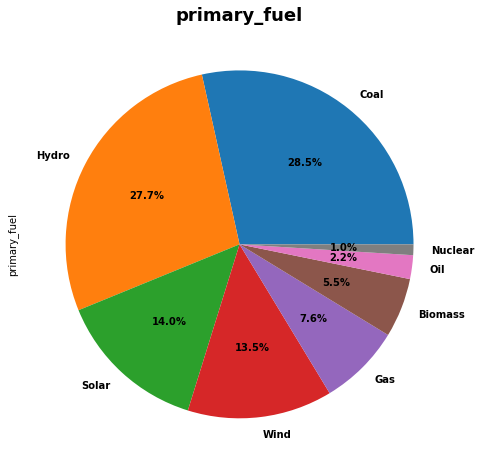

In [51]:
plt.subplots(figsize=(8,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('primary_fuel', fontsize=18,fontweight ='bold')
plt.show()

Observation: The maximum used fuel type is coal and hydro is on second place.Nuclear plants are very few.
Maimum powerplant are renewable energy based i.e. (hydro+ solar+ wind+ biomass+ nuclear),rest are non renewable energy based.


Capacity

In [52]:
print('Maximum capacity of Global_Power_Plant:',df.capacity_mw.max(),"MW")
print('Minimum capacity of Global_Power_Plant:',df.capacity_mw.min(),"MW")
print('Mean capacity of Global_Power_Plant:',df.capacity_mw.mean(),"MW")
print('Sum of the capacity of Global_Power_Plant:',df.capacity_mw.sum(),"MW")


Maximum capacity of Global_Power_Plant: 4760.0 MW
Minimum capacity of Global_Power_Plant: 0.0 MW
Mean capacity of Global_Power_Plant: 326.55899116997796 MW
Sum of the capacity of Global_Power_Plant: 295862.446 MW


In [53]:
print ('The number of values with maximum capacity_mw=', df['capacity_mw'].value_counts()[4760.0])


The number of values with maximum capacity_mw= 1


In [54]:
print ('The number of values with minimum capacity_mw=', df['capacity_mw'].value_counts()[0.0])


The number of values with minimum capacity_mw= 1


In [55]:
print(" Details of maximum capacity_mw value which is 4760 MW:\n\n ")

df.loc[df.capacity_mw==4760]


 Details of maximum capacity_mw value which is 4760 MW:

 


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
880,4760.0,24.0983,82.6719,Coal,Oil,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,20.0


In [56]:
print(" Details of minimum capacity_mw value whicch is 0 MW:\n\n ")

df.loc[df.capacity_mw==0]

 Details of minimum capacity_mw value whicch is 0 MW:

 


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
829,0.0,12.8491,77.6752,Solar,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,24.908918


Observation:
    
Sum of the capacity_mw is 295862 MW and Mean of the capacity_mw is 326 MW.
Coal is primary fuel of the maximum power plan with max capacity_mw. and geolocation_source is WRI. The age of the power plant is 20 years.
The Solar  as primary fuel of the power plant with min capacity_mw have minimum value is zero.


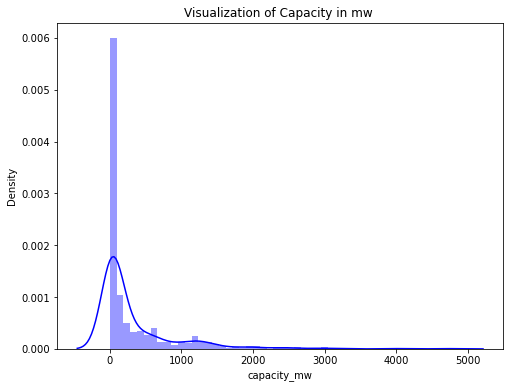

In [57]:
plt.figure(figsize=(8,6))
sns.distplot(df['capacity_mw'],color='blue')
plt.title("Visualization of Capacity in mw ")
plt.show()


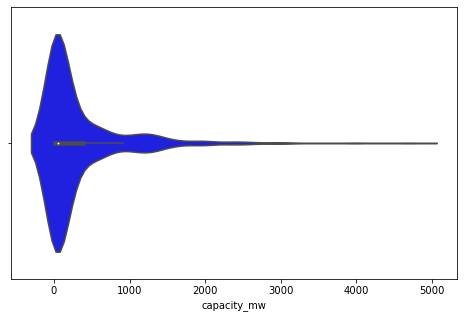

In [58]:
plt.figure(figsize=(8,5))
sns.violinplot(df.capacity_mw, color='blue')
plt.show()


Observation:
Coal is majorly contrbutor fuel for the power generation followed by Hydropower.
After year 2000 the power plants have increased in huge number.
Major of Power plant generations unit are producing at average varying in 100-1000.



In [59]:
cap1500 = df.loc[df.capacity_mw < 1500].shape
cap1500

(863, 13)

In [60]:
# percentage of capacity_mw < 1500

print ("Percentage of capacity_mw < 1500 is:", cap1500[0]/df.shape[0]*100,"%")


Percentage of capacity_mw < 1500 is: 95.25386313465783 %


In [61]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([min, max, sum])


,min,max,sum
primary_fuel,,,
Biomass,10.00,50.00,1003.260
Coal,10.00,4760.00,205839.220
Gas,15.50,1967.08,25172.506
Hydro,3.30,1956.00,46441.770
Nuclear,100.00,2000.00,8780.000
Oil,21.84,500.00,1778.840
Solar,0.00,648.00,2757.500
Wind,1.00,200.00,4089.350


Observation: Primary fuel with maximum sum of capacity MW and maximum value of capacity of power plant is coal.
Biomass as primary fuel with minimum sum of capacity MW is biomass and it is1003 MW.

Primary Fuel vs Generation 

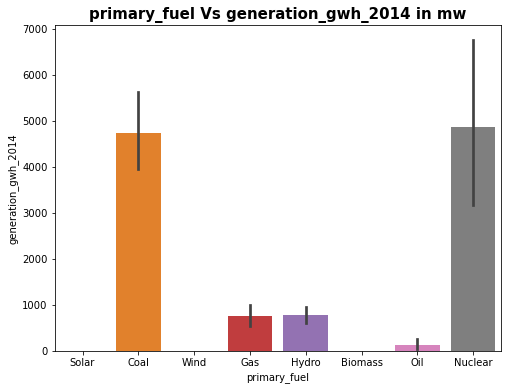

In [62]:
# Checking generation growth in 2014
plt.figure(figsize=(8,6))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df)
plt.title('primary_fuel Vs generation_gwh_2014 in mw', fontsize=15, fontweight='bold')
plt.show()

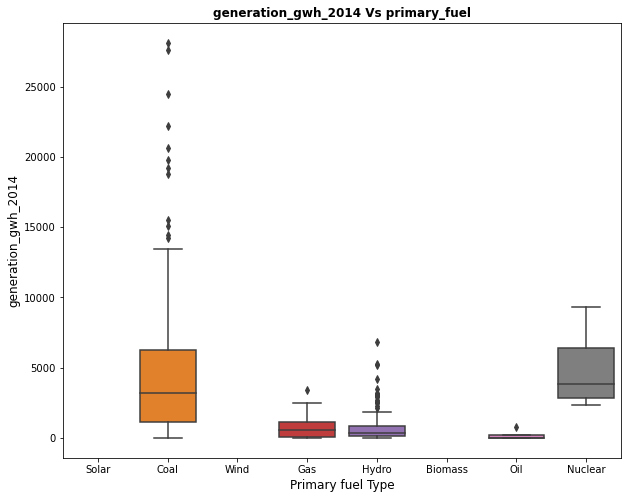

In [63]:
# checking relation between primary_fuel to generation_gwh_2014 
plt.figure(figsize=[10,8])
plt.title('generation_gwh_2014 Vs primary_fuel',fontsize=12, fontweight= "bold")
a = sns.boxplot(df['primary_fuel'],df["generation_gwh_2014"])
a.set_xlabel('Primary fuel Type',fontsize=12)
a.set_ylabel('generation_gwh_2014',fontsize=12)
plt.show()

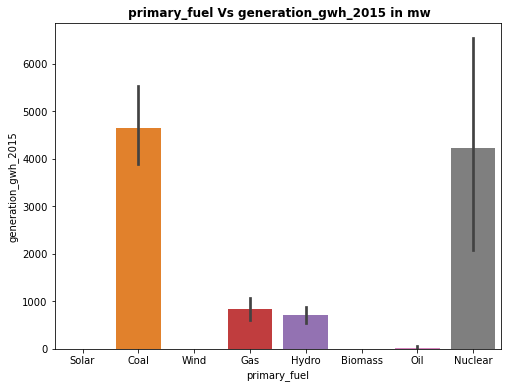

In [64]:
# Checking generation growth in 2015
plt.figure(figsize=(8,6))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df)
plt.title(' primary_fuel Vs generation_gwh_2015 in mw', fontsize=12, fontweight='bold')
plt.show()

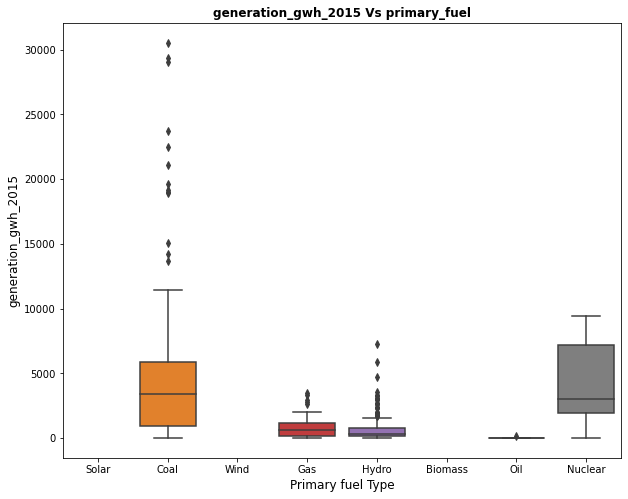

In [65]:
# checking relation between primary_fuel to generation_gwh_2015 
plt.figure(figsize=[10,8])
plt.title('generation_gwh_2015 Vs primary_fuel',fontsize=12, fontweight= "bold")
a = sns.boxplot(df['primary_fuel'],df["generation_gwh_2015"])
a.set_xlabel('Primary fuel Type',fontsize=12)
a.set_ylabel('generation_gwh_2015',fontsize=12)
plt.show()

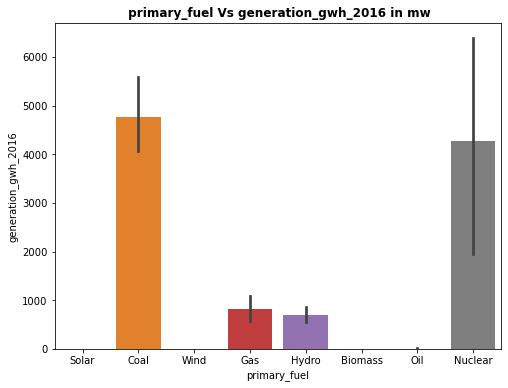

In [66]:
# Checking generation growth in 2016
plt.figure(figsize=(8,6))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df)
plt.title(' primary_fuel Vs generation_gwh_2016 in mw', fontsize=12, fontweight='bold')
plt.show()

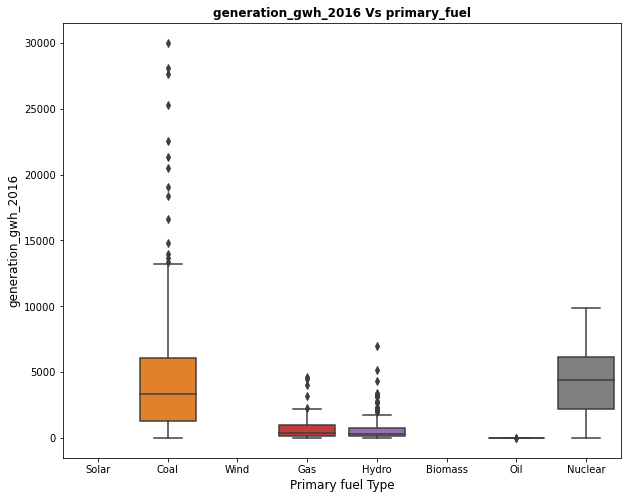

In [67]:
# checking relation between primary_fuel to generation_gwh_2016 
plt.figure(figsize=[10,8])
plt.title('generation_gwh_2016 Vs primary_fuel',fontsize=12, fontweight= "bold")
a = sns.boxplot(df['primary_fuel'],df["generation_gwh_2016"])
a.set_xlabel('Primary fuel Type',fontsize=12)
a.set_ylabel('generation_gwh_2016',fontsize=12)
plt.show()

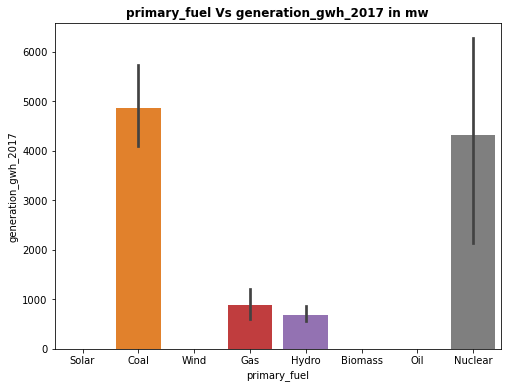

In [68]:
# Checking generation growth in 2017
plt.figure(figsize=(8,6))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df)
plt.title('primary_fuel Vs generation_gwh_2017 in mw', fontsize=12, fontweight='bold')
plt.show()

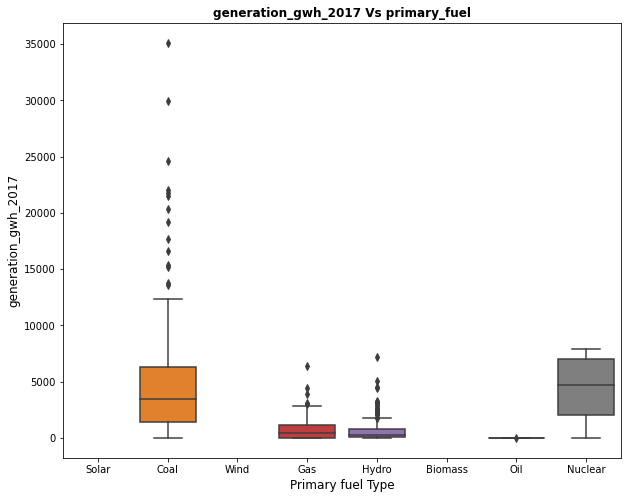

In [69]:
# checking relation between primary_fuel to generation_gwh_2017 
plt.figure(figsize=[10,8])
plt.title('generation_gwh_2017 Vs primary_fuel',fontsize=12, fontweight= "bold")
a = sns.boxplot(df['primary_fuel'],df["generation_gwh_2017"])
a.set_xlabel('Primary fuel Type',fontsize=12)
a.set_ylabel('generation_gwh_2017',fontsize=12)
plt.show()

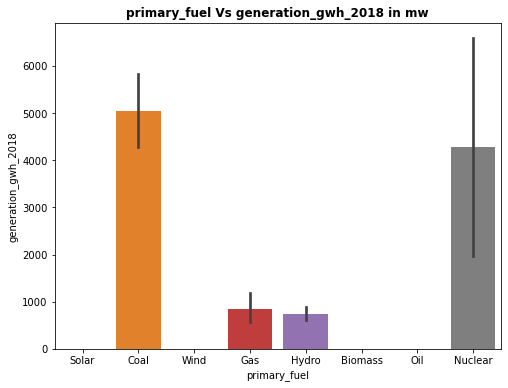

In [70]:
# Checking generation growth in 2018
plt.figure(figsize=(8,6))
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)
plt.title('primary_fuel Vs generation_gwh_2018 in mw', fontsize=12, fontweight='bold')
plt.show()

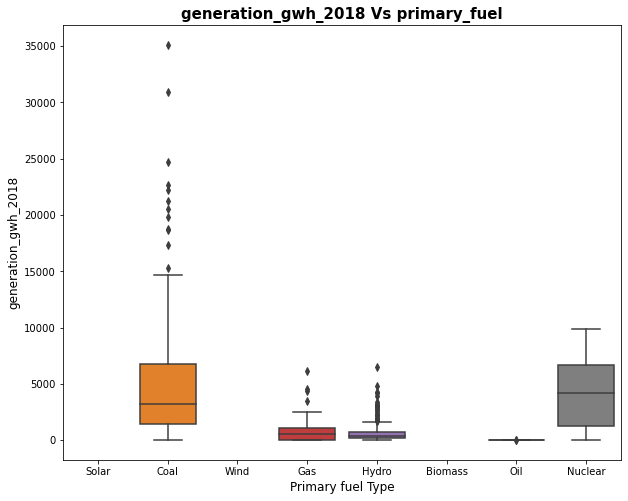

In [71]:
# checking relation between primary_fuel to generation_gwh_2018 
plt.figure(figsize=[10,8])
plt.title('generation_gwh_2018 Vs primary_fuel',fontsize=15, fontweight= "bold")
a = sns.boxplot(df['primary_fuel'],df["generation_gwh_2018"])
a.set_xlabel('Primary fuel Type',fontsize=12)
a.set_ylabel('generation_gwh_2018',fontsize=12)
plt.show()

Observation: There are Outliers in generation growth of coal fuel.
    Coal is highest mean of generation growth from year 2014-2018.
Nuclear is second highest mean of generation growth form year 2014-2018.


PrimaryFuel vs Latitude

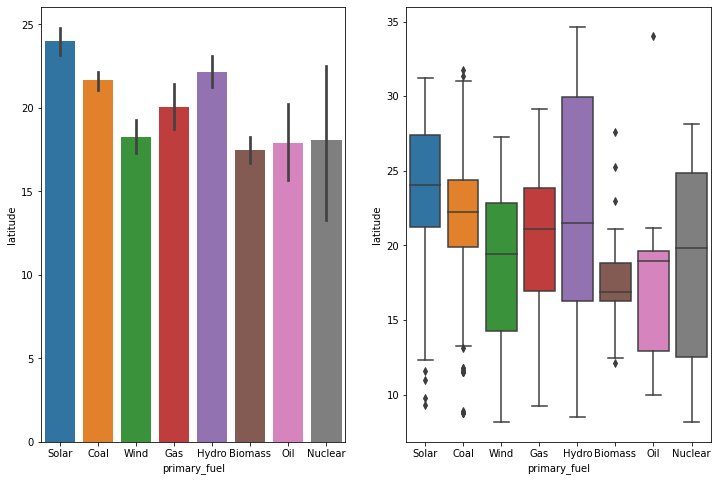

In [72]:
f,ax=plt.subplots(1,2,figsize=(12,8))
sns.barplot(x = "primary_fuel", y = "latitude", data = df,ax=ax[0])
sns.boxplot(x = "primary_fuel", y = "latitude",data=df,ax=ax[1])
plt.show()

Observation: There are outliers in Latitude.
    Range of is between 16 to 25 and Solar and Hydro has maximum latitude.

Primary Fuel Vs Longitude

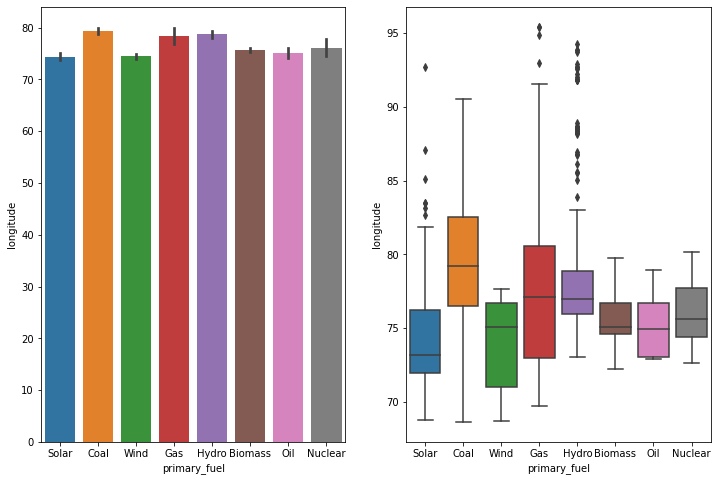

In [73]:
f,ax=plt.subplots(1,2,figsize=(12,8))
sns.barplot(x = "primary_fuel", y = "longitude", data = df,ax=ax[0])
sns.boxplot(x = "primary_fuel", y = "longitude",data=df,ax=ax[1])
plt.show()

Observation: There are outliers in Longitude. Range of is between 72 to 85 and coal has maximum longitude.

Primary Fuel vs Age

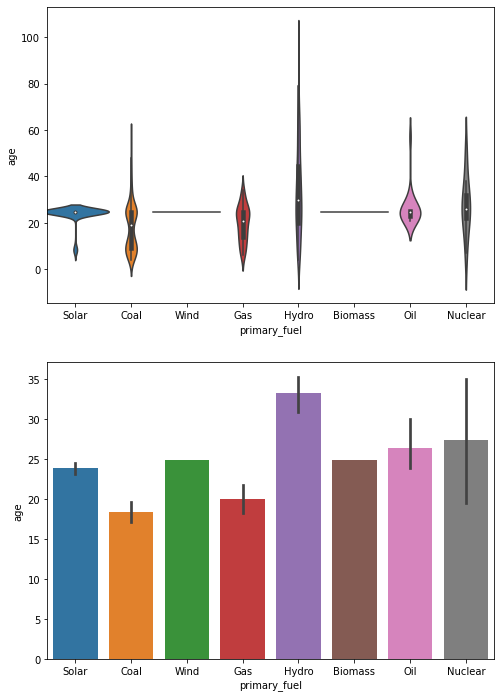

In [74]:
f,ax=plt.subplots(2,1,figsize=(8,12))
sns.violinplot(x = "primary_fuel", y = "age", data = df,ax=ax[0],width=1.2)
sns.barplot(x = "primary_fuel", y = "age",data=df,ax=ax[1])
plt.show()

Observation: Hydro fuel has maximum age and outliers are present in it.

# Comparing Target Variables

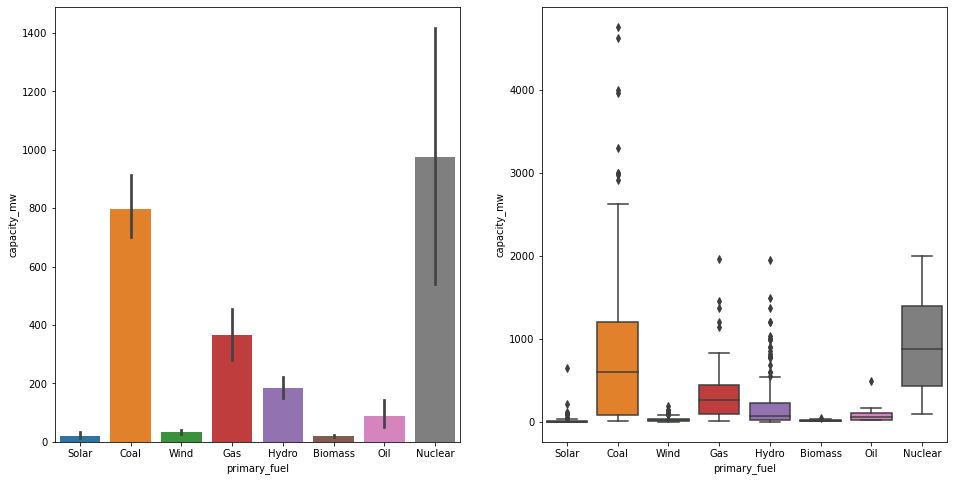

In [75]:
# Comparison of two target variable
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df,ax=ax[0])
sns.boxplot(x = "primary_fuel", y = "capacity_mw",data=df,ax=ax[1])
plt.show()


Observation:
    Solar and Biomass have minimum Capacity where as Nuclear power plant have maximum capacity.

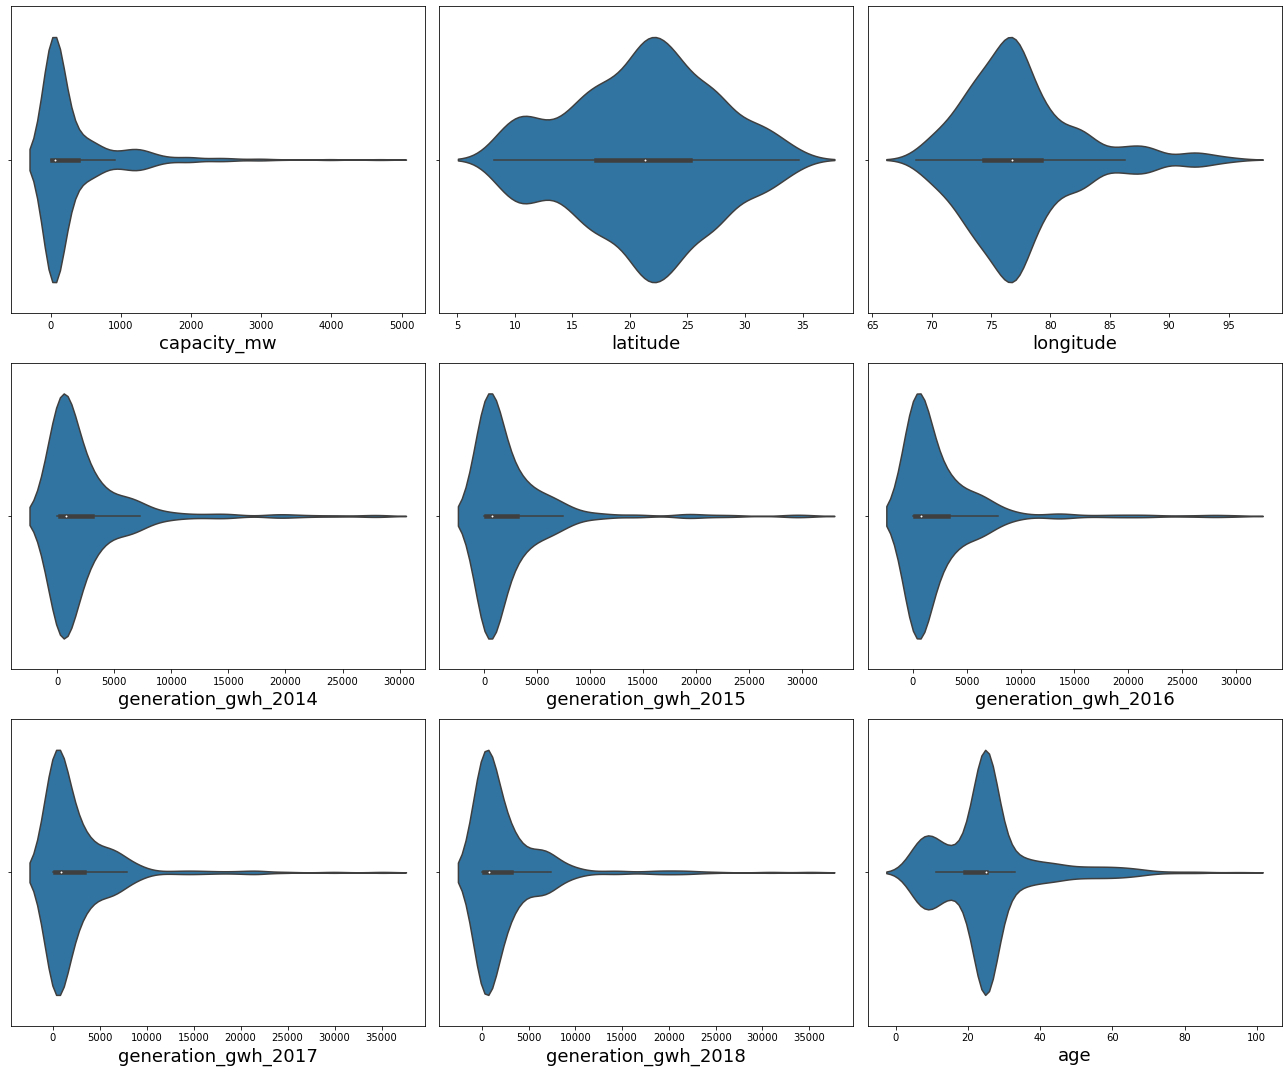

In [76]:
#distribution of numerical features.
data_num= df[["capacity_mw","latitude", "longitude", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016",
               "generation_gwh_2017", "generation_gwh_2018","age"]]
i=0
plt.figure(figsize=(18,15))
for p in data_num.columns:
    plt.subplot(3,3,i+1)
    sns.violinplot(data_num[p])
    plt.xlabel(p,fontsize=18)
    i+=1
    
plt.tight_layout()

Observation:
Most of the columns are skewed to right.
Need to remove the skewness in all these columns except the label.
Data is not normally distributed in all the columns except latitude and longitude.


# Bivariate Analysis


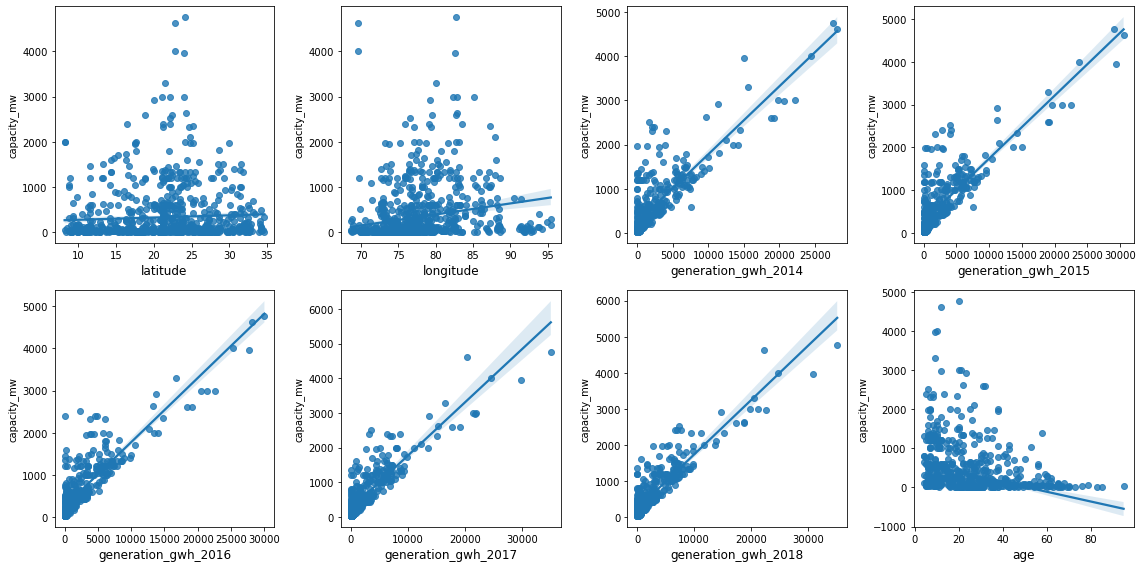

In [77]:
# Linear regplot with distribution of numerical features with capacity MW

data_num = df[["capacity_mw","latitude", "longitude", "generation_gwh_2014", "generation_gwh_2015"
                ,"generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018", "age"]]
i=0
plt.figure(figsize=(16,8))
for p in data_num.drop('capacity_mw', axis = 1).columns:
    plt.subplot(2,4,i+1)
    sns.regplot(x=p, y='capacity_mw', data=data_num)
    plt.xlabel(p,fontsize=12)
    i+=1
    
plt.tight_layout()

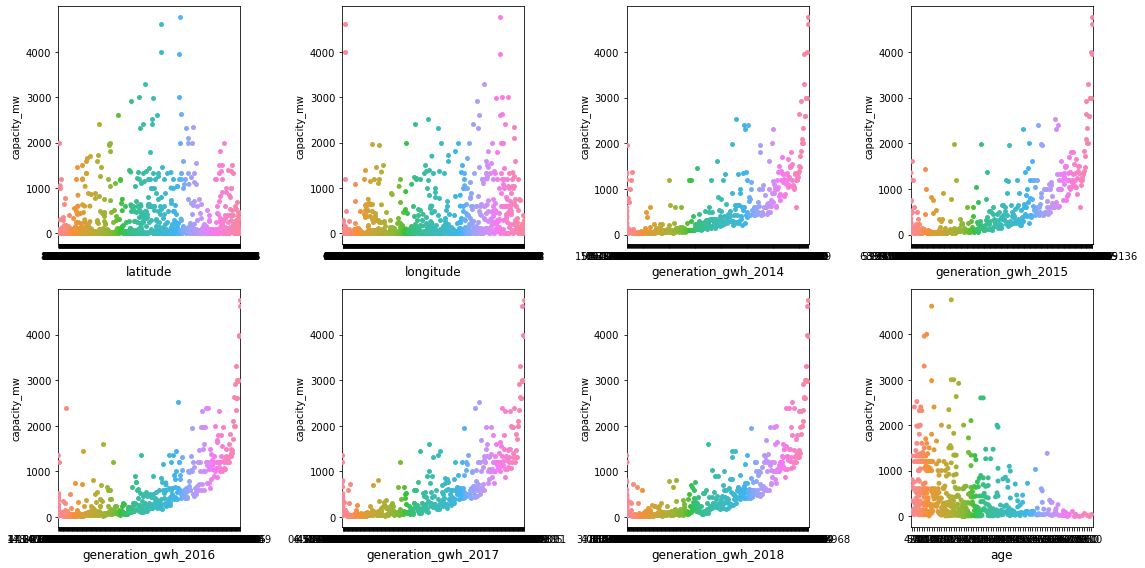

In [78]:
i=0
plt.figure(figsize=(16,8))
for p in data_num.drop('capacity_mw', axis = 1).columns:
    plt.subplot(2,4,i+1)
    sns.swarmplot(x=p, y='capacity_mw', data=data_num)
    plt.xlabel(p,fontsize=12)
    i+=1
    
plt.tight_layout()

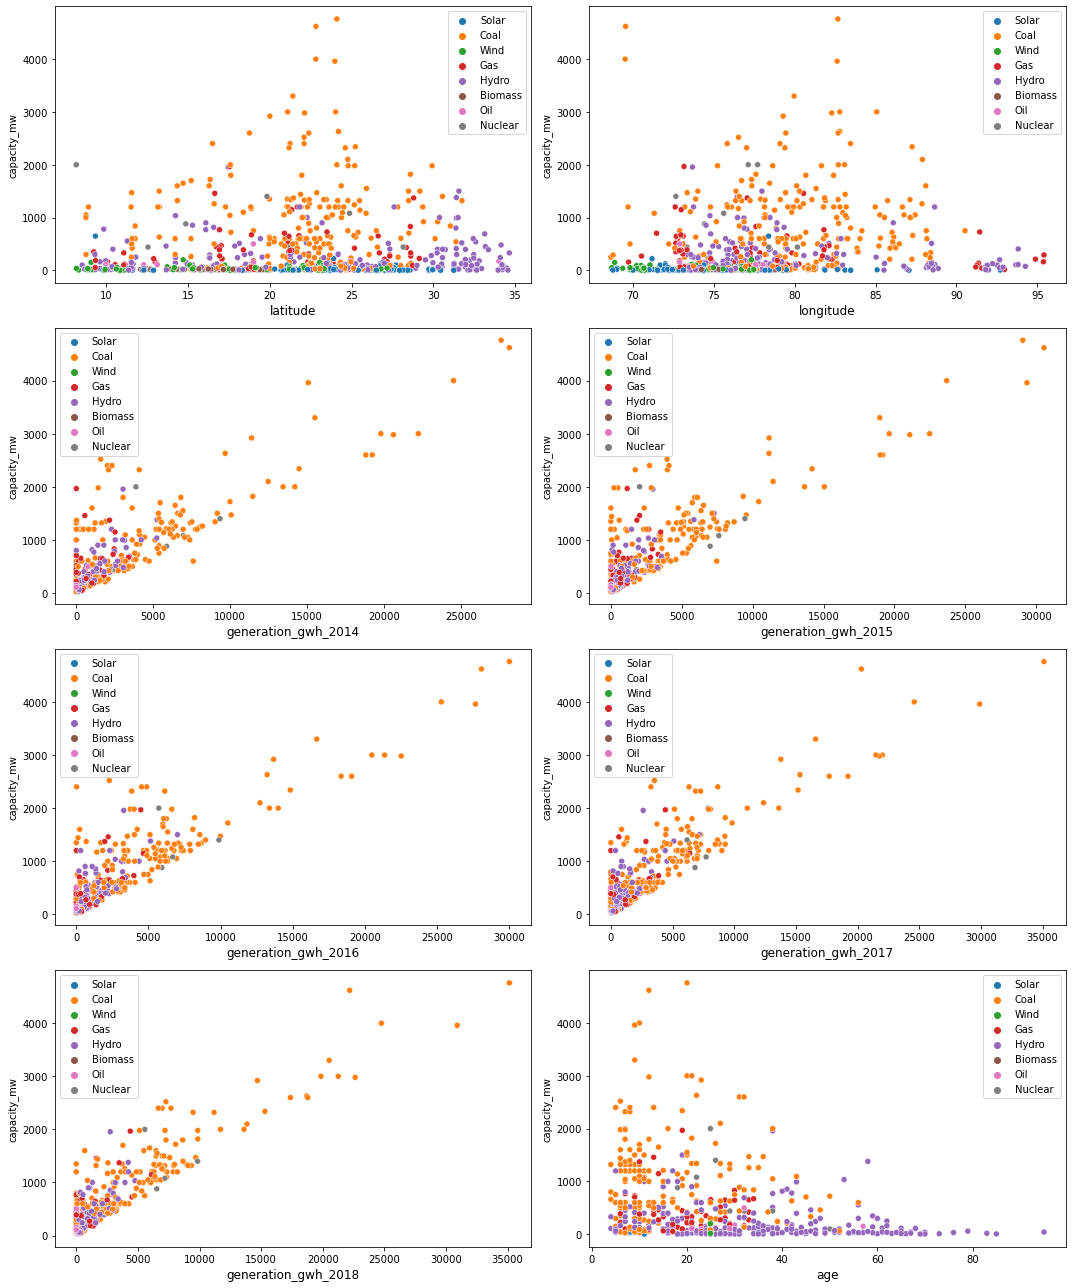

In [79]:
# Linear regplot with distribution of numerical features with capacity MW
i=0
plt.figure(figsize=(15,18))
for p in data_num.drop('capacity_mw', axis = 1).columns:
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=p, y='capacity_mw',data= df, hue= 'primary_fuel' ).legend(loc="best")
    plt.xlabel(p,fontsize=12)
    i+=1
    
plt.tight_layout()

Observation:"capacity_mw" and "generation_gwh"  are directly proportional to each other.
There is negative linear relationship between 'age' Vs "capacity_mw".


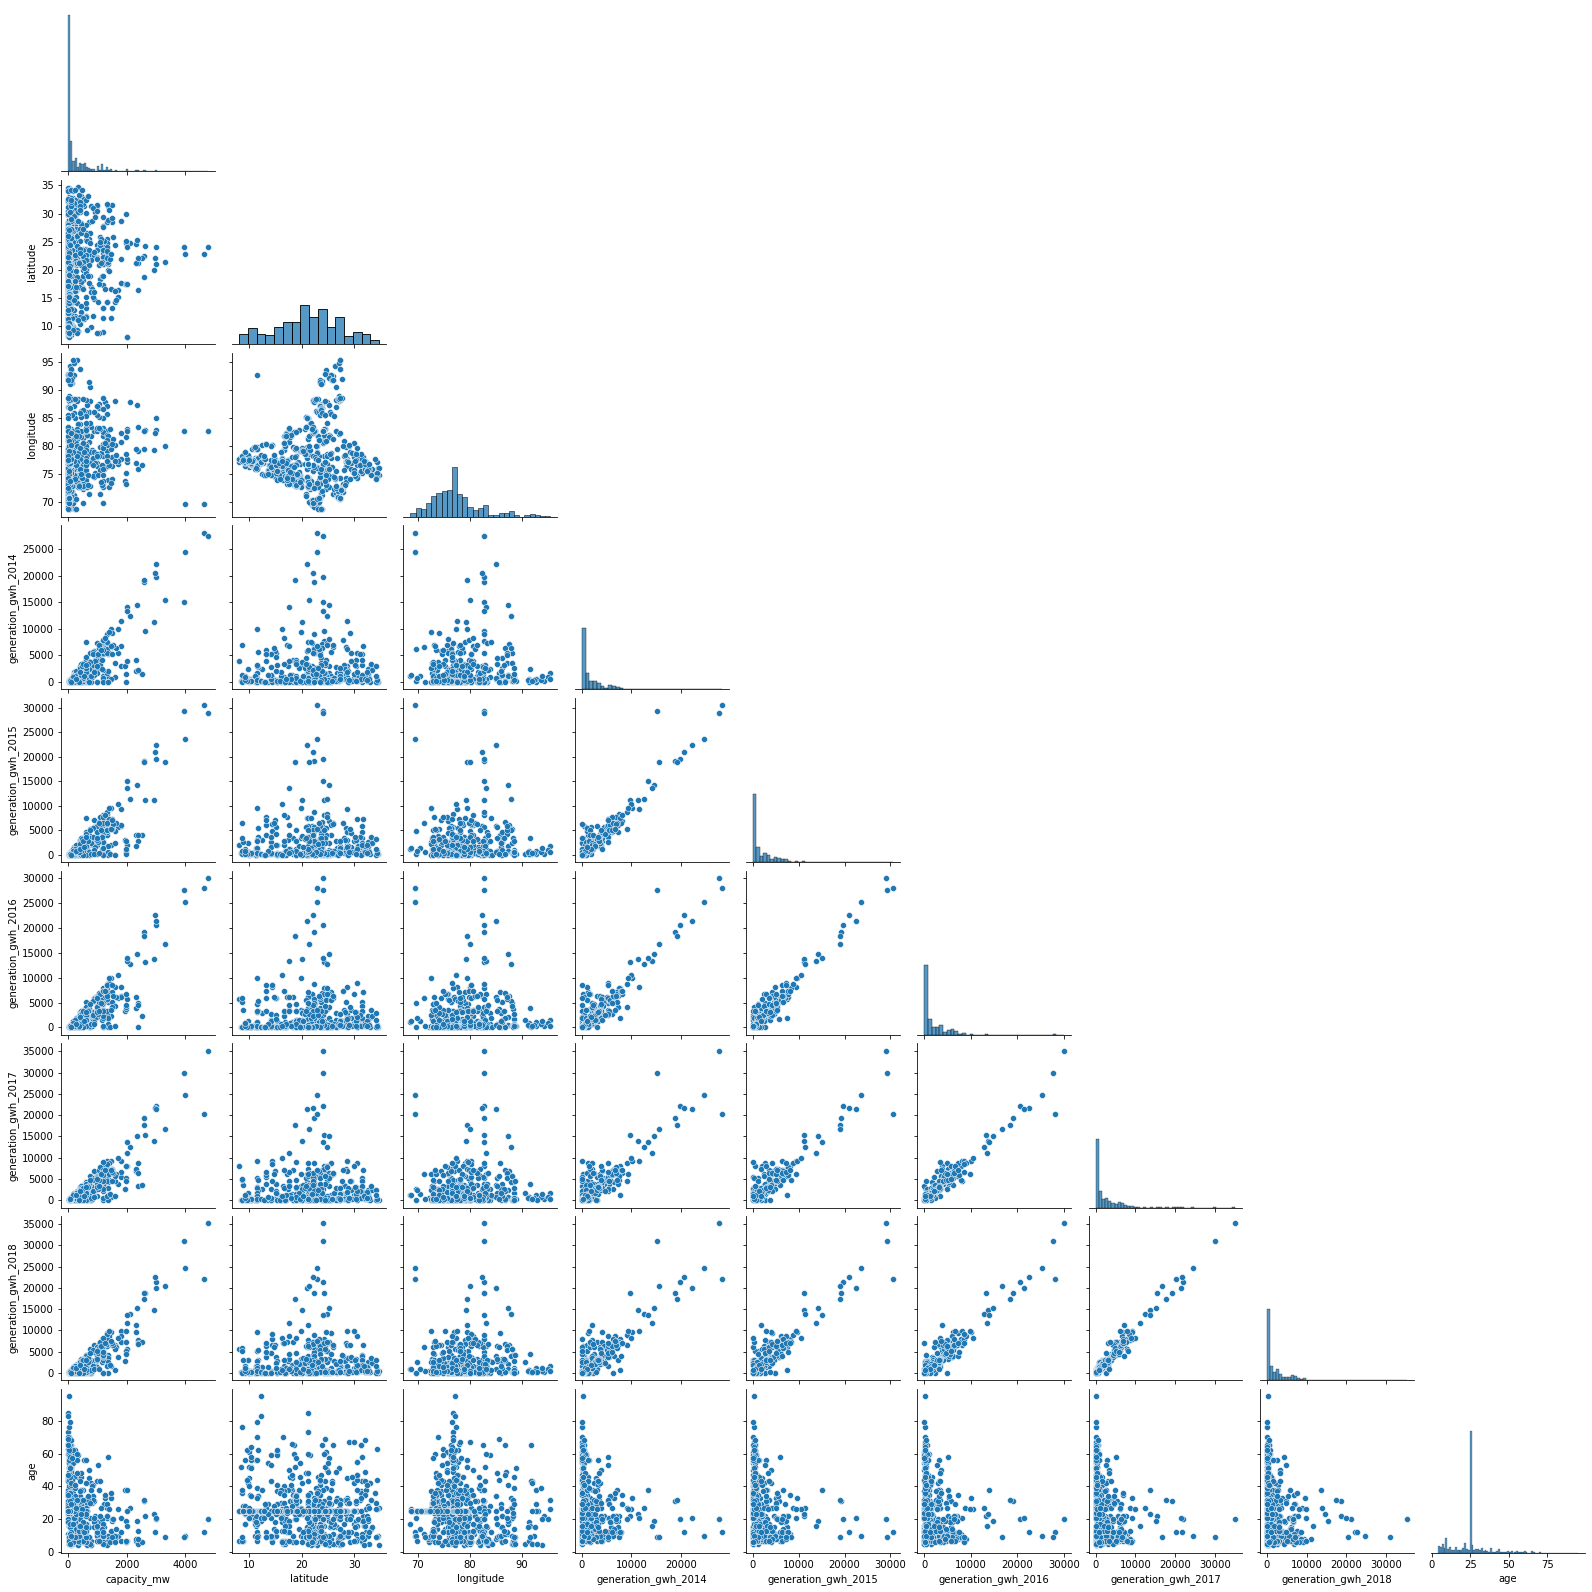

In [80]:
sns.pairplot(df, kind='scatter', corner=True)

Observation: Power plants are distributed all over the India normally. We can see linear relation ship in between the most of attributes.

Generation vs other fuel and geolocation

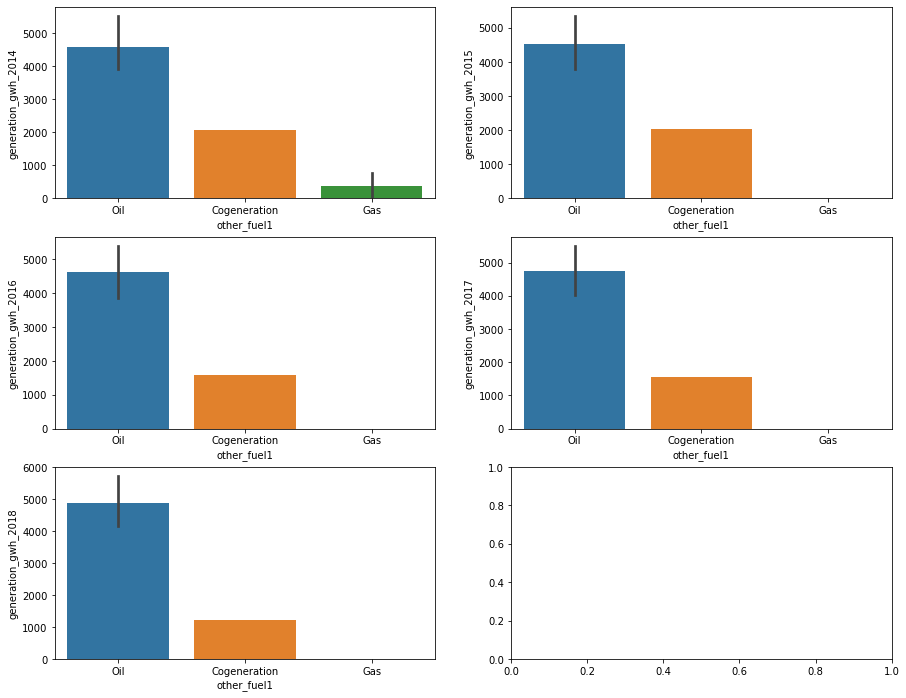

In [81]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

# Comparision between other_fuel1 and generation_gwh_2014
sns.barplot(x='other_fuel1',y='generation_gwh_2014',ax=axes[0,0],data=df)

# Comparision between other_fuel1 and generation_gwh_2015
sns.barplot(x='other_fuel1',y='generation_gwh_2015',ax=axes[0,1],data=df)

# Comparision between other_fuel1 and generation_gwh_2016
sns.barplot(x='other_fuel1',y='generation_gwh_2016',ax=axes[1,0],data=df)

# Comparision between other_fuel1 and generation_gwh_2017
sns.barplot(x='other_fuel1',y='generation_gwh_2017',ax=axes[1,1],data=df)

# Comparision between other_fuel1 and generation_gwh_2018
sns.barplot(x='other_fuel1',y='generation_gwh_2018',ax=axes[2,0],data=df)
plt.show()

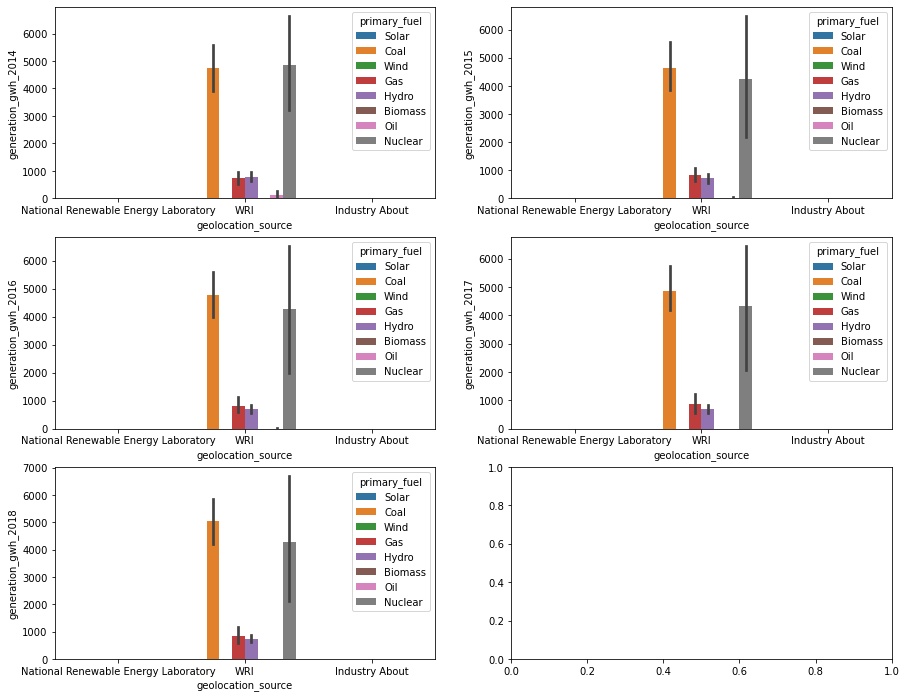

In [82]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

# Comparision between geolocation_source and generation_gwh_2014
sns.barplot(x='geolocation_source',y='generation_gwh_2014',ax=axes[0,0],data=df, hue= "primary_fuel")

# Comparision between geolocation_source and generation_gwh_2015
sns.barplot(x='geolocation_source',y='generation_gwh_2015',ax=axes[0,1],data=df, hue= "primary_fuel")

# Comparision between geolocation_source and generation_gwh_2016
sns.barplot(x='geolocation_source',y='generation_gwh_2016',ax=axes[1,0],data=df, hue= "primary_fuel")

# Comparision between geolocation_source and generation_gwh_2017
sns.barplot(x='geolocation_source',y='generation_gwh_2017',ax=axes[1,1],data=df, hue= "primary_fuel")

# Comparision between geolocation_source and generation_gwh_2018
sns.barplot(x='geolocation_source',y='generation_gwh_2018',ax=axes[2,0],data=df, hue= "primary_fuel")
plt.show()

Observation:For generation growth maximum generation source is WRI in 2014-2018.
Maximum used primary fuel is coal followed by nuclear. 
Max other_fuel is Oil. Minimum other_fuel is Gas.


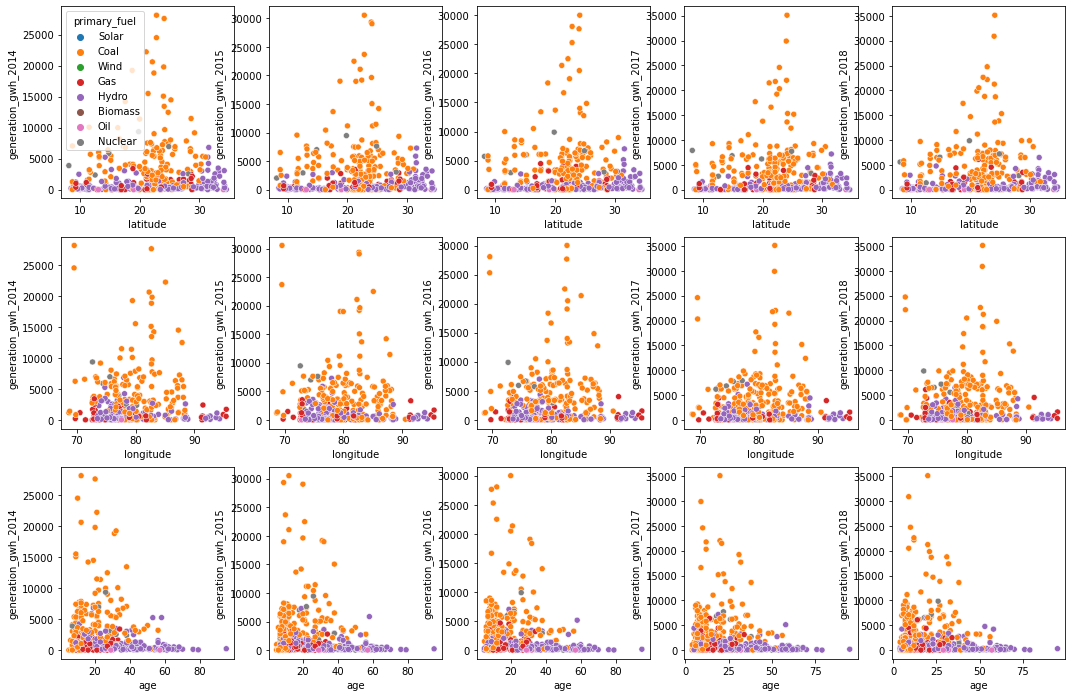

In [83]:
fig,axes=plt.subplots(3,5,figsize=(18,12))

sns.scatterplot(x='latitude',y='generation_gwh_2014',ax=axes[0,0],data=df, hue= "primary_fuel",legend="auto" )
sns.scatterplot(x='latitude',y='generation_gwh_2015',ax=axes[0,1],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='latitude',y='generation_gwh_2016',ax=axes[0,2],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='latitude',y='generation_gwh_2017',ax=axes[0,3],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='latitude',y='generation_gwh_2018',ax=axes[0,4],data=df, hue= "primary_fuel", legend= False)

sns.scatterplot(x='longitude',y='generation_gwh_2014',ax=axes[1,0],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='longitude',y='generation_gwh_2015',ax=axes[1,1],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='longitude',y='generation_gwh_2016',ax=axes[1,2],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='longitude',y='generation_gwh_2017',ax=axes[1,3],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='longitude',y='generation_gwh_2018',ax=axes[1,4],data=df, hue= "primary_fuel", legend= False)

sns.scatterplot(x='age',y='generation_gwh_2014',ax=axes[2,0],data=df, hue= "primary_fuel",legend= False)
sns.scatterplot(x='age',y='generation_gwh_2015',ax=axes[2,1],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='age',y='generation_gwh_2016',ax=axes[2,2],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='age',y='generation_gwh_2017',ax=axes[2,3],data=df, hue= "primary_fuel", legend= False)
sns.scatterplot(x='age',y='generation_gwh_2018',ax=axes[2,4],data=df, hue= "primary_fuel", legend= False)
plt.show()

Observation:Latitude,longitude and seems same with respect to generation.

# Encoding Categorical Data

In [84]:
# Using Label Encoder
categorical_data =['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_data:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,11.000000
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,24.908918
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,24.908918
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,18.000000
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,7.000000


Observation: Now all categorical data is encoded.

# Correlation Matrix

In [85]:

df.corr().T

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
capacity_mw,1.000000,0.050992,0.199247,-0.380086,-0.606173,-0.242483,0.205137,0.839094,0.844352,0.870620,0.886673,0.901918,-0.274332
latitude,0.050992,1.000000,0.036342,-0.010220,-0.032795,0.055935,-0.184291,0.060677,0.049134,0.041905,0.041711,0.041414,-0.102069
longitude,0.199247,0.036342,1.000000,-0.352329,-0.277577,-0.236743,0.249188,0.017769,0.027840,0.055967,0.055623,0.052362,-0.091765
primary_fuel,-0.380086,-0.010220,-0.352329,1.000000,0.476256,0.054645,-0.484724,-0.405019,-0.393335,-0.408951,-0.421736,-0.421518,0.126844
other_fuel1,-0.606173,-0.032795,-0.277577,0.476256,1.000000,0.254506,-0.204888,-0.420870,-0.403869,-0.419541,-0.435230,-0.429803,0.322491
source,-0.242483,0.055935,-0.236743,0.054645,0.254506,1.000000,-0.505614,NaN,NaN,NaN,NaN,NaN,-0.021531
geolocation_source,0.205137,-0.184291,0.249188,-0.484724,-0.204888,-0.505614,1.000000,NaN,NaN,NaN,NaN,NaN,0.007844
generation_gwh_2014,0.839094,0.060677,0.017769,-0.405019,-0.420870,NaN,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,-0.160014
generation_gwh_2015,0.844352,0.049134,0.027840,-0.393335,-0.403869,NaN,NaN,0.961098,1.000000,0.974918,0.940191,0.934371,-0.170363
generation_gwh_2016,0.870620,0.041905,0.055967,-0.408951,-0.419541,NaN,NaN,0.937060,0.974918,1.000000,0.972024,0.962073,-0.193743


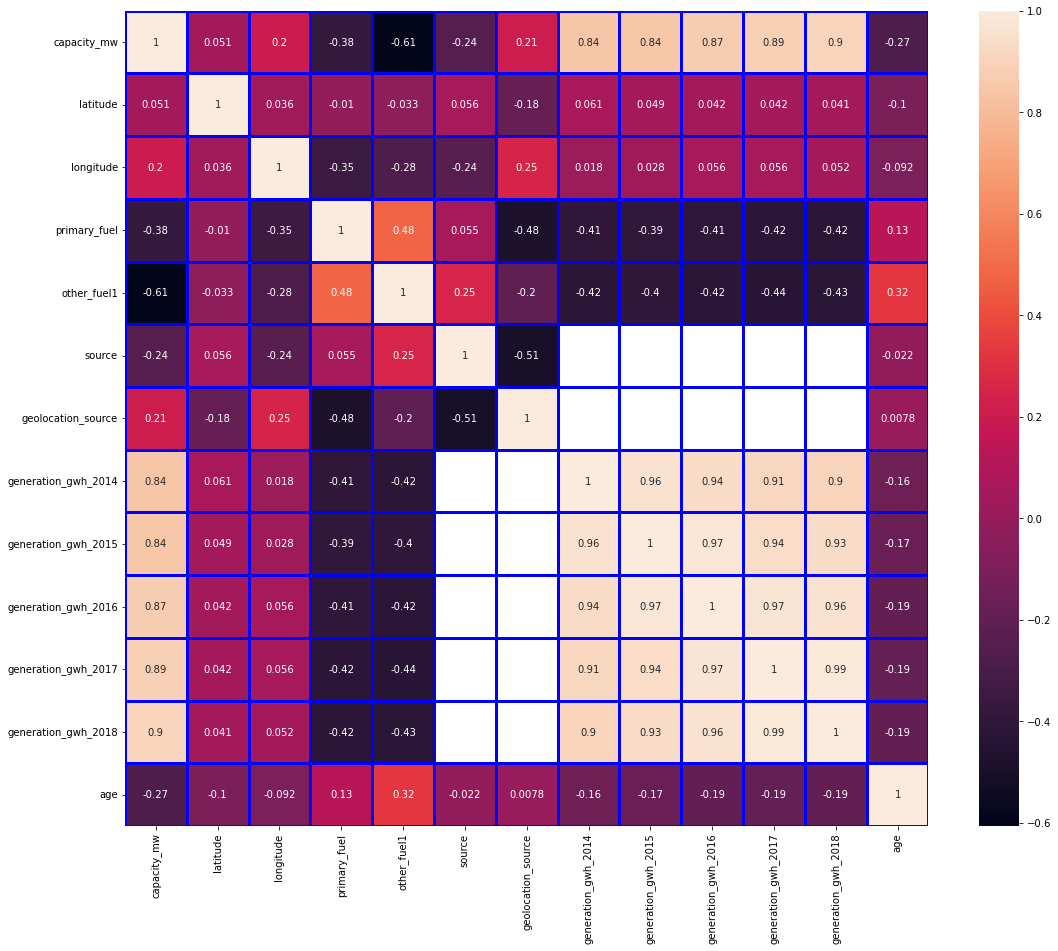

In [86]:
plt.subplots(figsize=(18,15))
sns.heatmap(df.corr(), annot= True, linecolor= "blue",  linewidths= 2.5)
plt.show()

Observation:
There is strong positive correlation between generation_growth of different years and capacity_mw.

There is negative correlation between capacity_mw and primary_fuel, source.

Generation_growth and primary_fuel is negetively correlated.

There is negative correlation between primary_fuel Vs source and lattude is very less.

Column is blank for source and geolocation source with generation_growth of different years.

In [87]:
data_new= df.copy()
data_new1= df.copy()

# Correlation of Target1(primary_fuel) with other features

<AxesSubplot:title={'center':'feature vs primary_fuel corr'}>

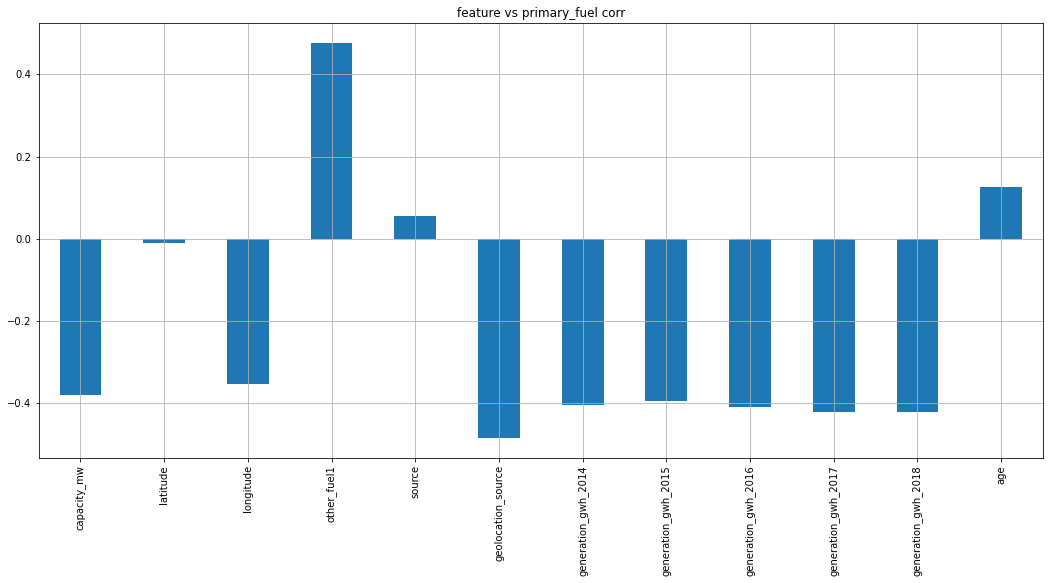

In [88]:
data_new.drop("primary_fuel", axis=1).corrwith(data_new["primary_fuel"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs primary_fuel corr')


# Correlation of Target2(Capacity_mw) with other features

<AxesSubplot:title={'center':'feature vs capacity_mw corr'}>

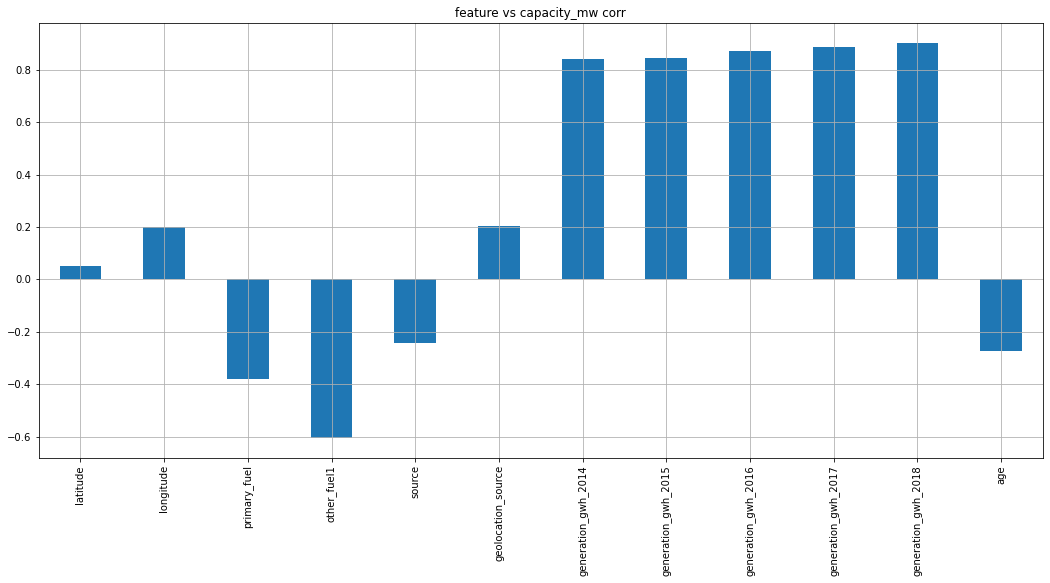

In [89]:
data_new1.drop("capacity_mw", axis=1).corrwith(data_new1["capacity_mw"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs capacity_mw corr')


# Checking Outliers

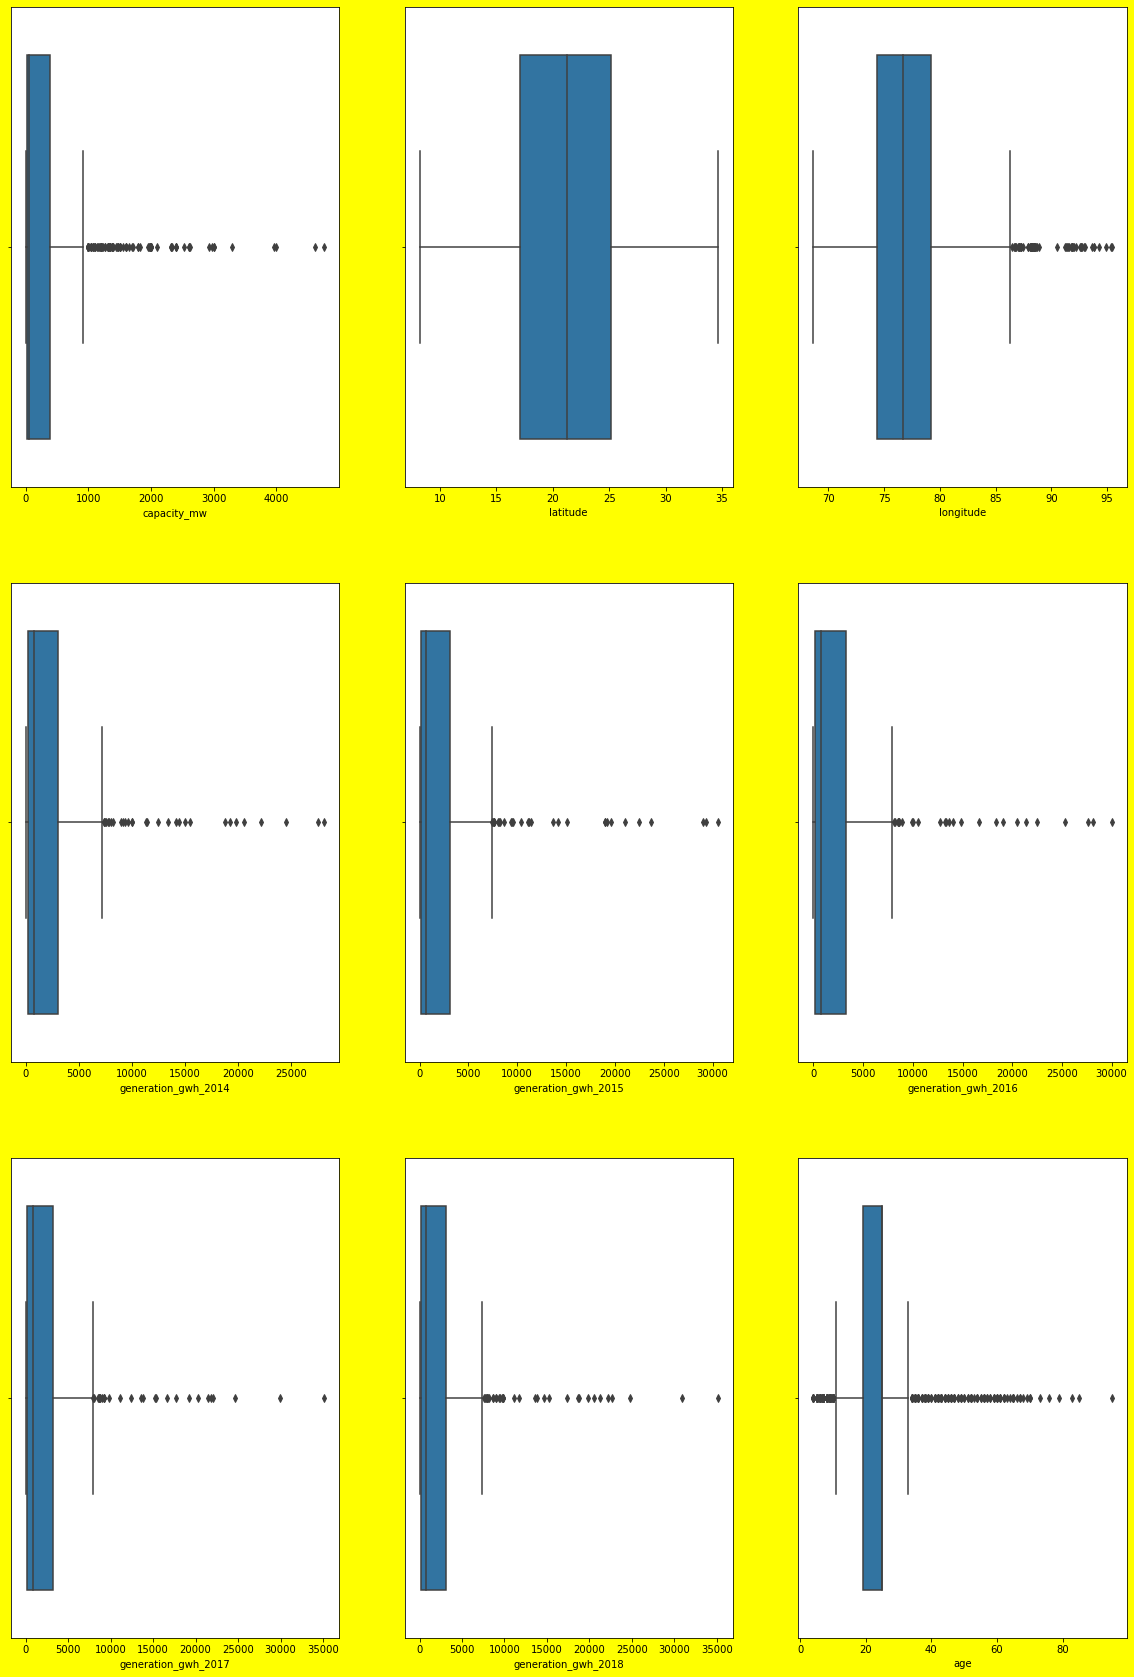

In [90]:
# Checking Outliers

plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
data1= df.drop(['primary_fuel', 'other_fuel1', 'source', 'geolocation_source'], axis=1)
for x in data1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data1[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()


Observation: There are outliers present in dataset.
    


# Removing Outliers

In [91]:
# Using Quantile IQR Method
data2= df.copy()

In [92]:
#1st quantile
q1= data2. quantile(0.1)
#3rd quantile
q3= data2. quantile(0.85)
#IQR
iqr= q3-q1

In [93]:
data_new = data2[~((data2 < (q1 - 1.5 *iqr)) |(data2 > (q3 + 1.5 *iqr))).any(axis=1)]
print(data_new.shape)

(865, 13)


In [94]:
df.shape

(906, 13)

Data loss

In [95]:
# Loss of data
((906-865)/906)*100

4.525386313465784

# Checking Skewness

In [96]:
data_new.skew()

capacity_mw            1.912149
latitude              -0.139863
longitude              1.216802
primary_fuel           0.417534
other_fuel1           -1.625720
source                 1.754185
geolocation_source    -2.079925
generation_gwh_2014    1.617864
generation_gwh_2015    1.555440
generation_gwh_2016    1.613428
generation_gwh_2017    1.503471
generation_gwh_2018    1.534457
age                    1.066248
dtype: float64

Observation: There is skewness present in dataset.

In [97]:
data_new1= data_new.copy()

# Removing Skewness

In [98]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
skew_data = ['latitude','longitude','other_fuel1', 'source','geolocation_source'
        ,'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','age']


In [99]:
data_new1[skew_data] = scaler.fit_transform(data_new1[skew_data].values)
data_new1.head()



,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,age
0,2.5,1.142036,-0.926073,6,0.492764,1.540875,-2.255801,NaN,NaN,NaN,NaN,NaN,-1.252268
1,98.0,0.567077,-0.511421,1,0.492764,1.994077,0.407107,NaN,NaN,NaN,NaN,NaN,0.141361
2,39.2,0.091537,-2.399750,7,0.492764,-0.483747,0.407107,NaN,NaN,NaN,NaN,NaN,0.141361
3,135.0,0.417755,2.155020,2,0.492764,-0.416731,0.407107,-0.118793,0.108429,0.130512,-0.047289,-0.074125,-0.480194
5,250.0,0.400724,-2.738227,1,-2.029132,-0.416731,0.407107,0.242862,0.317427,0.296003,0.259988,0.167071,-0.579745


In [100]:
df= data_new1[skew_data]
df.shape

(865, 11)

In [101]:
data_new1.skew()

capacity_mw            1.912149
latitude              -0.075456
longitude              0.004248
primary_fuel           0.417534
other_fuel1           -1.539280
source                -0.183354
geolocation_source    -2.053320
generation_gwh_2014   -0.136175
generation_gwh_2015   -0.144564
generation_gwh_2016   -0.136951
generation_gwh_2017   -0.155301
generation_gwh_2018   -0.162547
age                    0.031391
dtype: float64

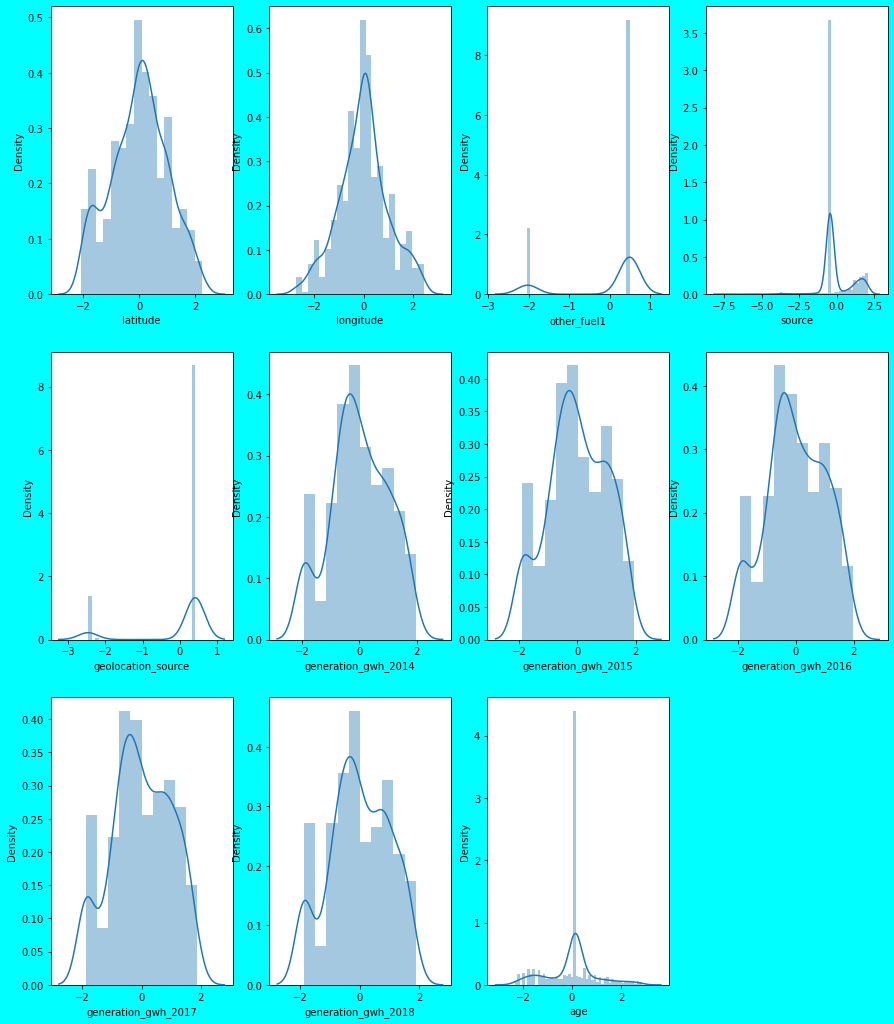

In [102]:
plt.figure(figsize=(15,18),facecolor='cyan')
plotnumber=1
for x in df:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

Observation: All the skewness has been removed from dataset

In [103]:
data_new1.drop(["generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
                "generation_gwh_2018", "geolocation_source"], axis =1, inplace= True)

data_new1.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,age
0,2.5,1.142036,-0.926073,6,0.492764,1.540875,-1.252268
1,98.0,0.567077,-0.511421,1,0.492764,1.994077,0.141361
2,39.2,0.091537,-2.399750,7,0.492764,-0.483747,0.141361
3,135.0,0.417755,2.155020,2,0.492764,-0.416731,-0.480194
5,250.0,0.400724,-2.738227,1,-2.029132,-0.416731,-0.579745


Observation: geolocation_source have a highly skewed value and less correlation with target,so we can drop it.

In [104]:
data_new1.isna().sum()

capacity_mw     0
latitude        0
longitude       0
primary_fuel    0
other_fuel1     0
source          0
age             0
dtype: int64

# Multicolinearity

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data_new1.values,i)for i in range(data_new1.shape[1])]
vif["Features"] = data_new1.columns
vif

,VIF,Features
0,2.009698,capacity_mw
1,1.013639,latitude
2,1.181081,longitude
3,1.504189,primary_fuel
4,2.100841,other_fuel1
5,1.087246,source
6,1.212224,age


There is no multicollinearity is present.

In [106]:
# for primary_fuel
data_final1 =data_new1.copy()
# for capacity_mw
data_final2 =data_new1.copy() 

# Using different Classification ML Models for  Target-1(primary_fuel)

# Scaling Data

In [107]:
# Splitting data in target and dependent 

x = data_final1.drop(['primary_fuel'], axis =1)
y = data_final1['primary_fuel']

In [108]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

Find Best Random State

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)


Best accuracy is 0.7649769585253456 on Random_state 360


In [110]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (648, 6)
Training target shape: (648,)
Test feature shape: (217, 6)
Test target shape: (217,)


# Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=360)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.7649769585253456
cof_mat:
  [[ 5  0  0  1  0  0  1  2]
 [ 0 49  0  3  0  0  3  3]
 [ 1  2  4  5  0  0  1  1]
 [ 0  0  1 52  0  0  0 11]
 [ 0  0  1  1  0  0  0  0]
 [ 2  2  0  1  0  0  1  0]
 [ 1  1  0  1  0  0 28  1]
 [ 0  0  0  4  0  0  0 28]]
classification report:
                precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.91      0.84      0.88        58
           2       0.67      0.29      0.40        14
           3       0.76      0.81      0.79        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.82      0.88      0.85        32
           7       0.61      0.88      0.72        32

    accuracy                           0.76       217
   macro avg       0.54      0.53      0.52       217
weighted avg       0.75      0.76      0.75       217

-----------
-----------
training score :  0.6682098765432098
te

Hyperparameter tuning

In [112]:
# Using GridsearchCV

from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2','l1', 'elasticnet', 'none'], C=[10, 1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80], multi_class=['auto', 'ovr', 'multinomial'])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 10, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


In [113]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.7419354838709677
cof_mat:
  [[ 5  0  0  0  0  0  2  2]
 [ 0 49  0  4  0  0  3  2]
 [ 0  3  4  5  0  0  1  1]
 [ 0  0  1 49  2  0  1 11]
 [ 0  0  1  0  1  0  0  0]
 [ 1  3  0  1  0  0  1  0]
 [ 1  2  0  1  0  0 27  1]
 [ 0  0  0  6  0  0  0 26]]
classification report:
                precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.86      0.84      0.85        58
           2       0.67      0.29      0.40        14
           3       0.74      0.77      0.75        64
           4       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         6
           6       0.77      0.84      0.81        32
           7       0.60      0.81      0.69        32

    accuracy                           0.74       217
   macro avg       0.59      0.58      0.57       217
weighted avg       0.73      0.74      0.73       217

-----------
-----------
training score :  0.6805555555555556
te

Observation: Accuracy score has not improved after using gridsearchCV.

# Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8986175115207373


cof_mat:  [[ 6  0  0  0  0  0  3  0]
 [ 0 56  0  0  0  0  1  1]
 [ 0  3  9  2  0  0  0  0]
 [ 0  0  2 62  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  3  1  1  0  1  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report:                precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.86      0.97      0.91        58
           2       0.69      0.64      0.67        14
           3       0.94      0.97      0.95        64
           4       0.00      0.00      0.00         2
           5       1.00      0.17      0.29         6
           6       0.88      0.91      0.89        32
           7       0.97      1.00      0.98        32

    accuracy                           0.90       217
   macro avg       0.79      0.66      0.69       217
weighted avg       0.89      0.90      0.89       217

-----------
-----------
training score :  1.0
testing score :

Hyperparameter tuning

In [115]:
# Using GridsearchCV

params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,5,4],
          'criterion' : ["gini", "entropy","log_loss"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [116]:
grid_rf_best = rf_grd.best_estimator_
grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.8986175115207373


cof_mat:  [[ 6  1  0  0  0  0  2  0]
 [ 0 56  0  0  0  0  1  1]
 [ 0  3  9  2  0  0  0  0]
 [ 0  0  0 63  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  3  2  1  0  0  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.85      0.97      0.90        58
           2       0.75      0.64      0.69        14
           3       0.94      0.98      0.96        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.91      0.91      0.91        32
           7       0.97      1.00      0.98        32

    accuracy                           0.90       217
   macro avg       0.68      0.65      0.66       217
weighted avg       0.87      0.90      0.88       217

-----------
-----------
training score :  0.9845679012345679

Observation: Accuracy score not improved after using gridsearchCV.

# Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.880184331797235


cof_mat:  [[ 6  2  0  0  0  0  1  0]
 [ 0 52  4  0  0  0  1  1]
 [ 0  3  9  2  0  0  0  0]
 [ 0  0  2 60  0  2  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  1  2  0  0  3  0  0]
 [ 0  2  1  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report: 

               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.87      0.90      0.88        58
           2       0.47      0.64      0.55        14
           3       0.95      0.94      0.94        64
           4       0.00      0.00      0.00         2
           5       0.60      0.50      0.55         6
           6       0.94      0.91      0.92        32
           7       0.97      1.00      0.98        32

    accuracy                           0.88       217
   macro avg       0.72      0.69      0.70       217
weighted avg       0.88      0.88      0.88       217

-----------
-----------
training score :  1.0
testing score 

Hyperparameter tuning

In [118]:
# Using GridsearchCV

param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10, 0.0001,1,0.05,0.5],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=9, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'best'}


In [119]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.8663594470046083


cof_mat:  [[ 7  1  0  0  0  0  1  0]
 [ 1 51  3  0  0  0  2  1]
 [ 0  3  9  2  0  0  0  0]
 [ 0  0  2 60  0  2  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  1  2  1  0  2  0  0]
 [ 1  3  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  1 31]]


classification report: 

               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.86      0.88      0.87        58
           2       0.53      0.64      0.58        14
           3       0.94      0.94      0.94        64
           4       0.00      0.00      0.00         2
           5       0.50      0.33      0.40         6
           6       0.88      0.88      0.88        32
           7       0.97      0.97      0.97        32

    accuracy                           0.87       217
   macro avg       0.68      0.68      0.68       217
weighted avg       0.86      0.87      0.86       217

-----------
-----------
training score :  0.993827160493827

Observation: Accuracy score not improved after using gridsearchCV and training score and testing score is decreased.

# Gradient Boosting Classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.8847926267281107


cof_mat:  [[ 6  1  0  0  0  0  2  0]
 [ 0 53  0  0  3  0  1  1]
 [ 0  3  8  3  0  0  0  0]
 [ 0  0  1 62  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report: 

               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.85      0.91      0.88        58
           2       0.73      0.57      0.64        14
           3       0.93      0.97      0.95        64
           4       0.00      0.00      0.00         2
           5       0.67      0.33      0.44         6
           6       0.91      0.91      0.91        32
           7       0.97      1.00      0.98        32

    accuracy                           0.88       217
   macro avg       0.76      0.67      0.70       217
weighted avg       0.88      0.88      0.88       217

-----------
-----------
training score :  1.0
testing score

Hyperparameter tuning

In [121]:
# Using GridsearchCV

param= {"min_samples_split" : [2,3], "max_depth":[3,5], "learning_rate": [0.1,0.01,1.0], 
        "min_samples_leaf" :[1,2],"loss" :['log_loss', 'deviance'], "criterion":['friedman_mse', 'squared_error'] }


grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [122]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8940092165898618


cof_mat:  [[ 6  0  0  0  0  0  3  0]
 [ 0 52  1  0  2  0  2  1]
 [ 0  3  7  4  0  0  0  0]
 [ 0  0  0 64  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  1  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 32]]


classification report:

                precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.90      0.90      0.90        58
           2       0.70      0.50      0.58        14
           3       0.91      1.00      0.96        64
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         6
           6       0.86      0.97      0.91        32
           7       0.97      1.00      0.98        32

    accuracy                           0.89       217
   macro avg       0.79      0.67      0.70       217
weighted avg       0.89      0.89      0.89       217

-----------
-----------
training score :  1.0
testing score

Observation:Accuracy score slightly improved after using gridsearchCV.

# Extra Trees Classifier

In [123]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.9032258064516129


cof_mat:  [[ 6  0  0  0  0  0  3  0]
 [ 0 56  0  0  0  0  1  1]
 [ 0  3  8  3  0  0  0  0]
 [ 0  0  1 63  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report:                precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.88      0.97      0.92        58
           2       0.73      0.57      0.64        14
           3       0.93      0.98      0.95        64
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         6
           6       0.88      0.91      0.89        32
           7       0.97      1.00      0.98        32

    accuracy                           0.90       217
   macro avg       0.80      0.68      0.71       217
weighted avg       0.90      0.90      0.89       217

-----------
-----------
training score :  1.0
testing score :

Hyperparameter tuning

In [124]:
# Using GridsearchCV

params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,5,4],
          'criterion' : ["gini", "entropy","log_loss"],"ccp_alpha":[0, 0.001, 0.01] }

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'ccp_alpha': 0, 'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 80}


In [125]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8986175115207373


cof_mat:  [[ 6  0  0  0  0  0  3  0]
 [ 0 56  0  0  0  0  1  1]
 [ 0  3  7  4  0  0  0  0]
 [ 0  0  1 63  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  3  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]


classification report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.88      0.97      0.92        58
           2       0.70      0.50      0.58        14
           3       0.91      0.98      0.95        64
           4       0.00      0.00      0.00         2
           5       1.00      0.33      0.50         6
           6       0.88      0.91      0.89        32
           7       0.97      1.00      0.98        32

    accuracy                           0.90       217
   macro avg       0.79      0.67      0.70       217
weighted avg       0.89      0.90      0.89       217

-----------
-----------
training score :  0.9953703703703703

Observation:Accuracy Score improved after using gridsearchCV.

# SVC('rbf')

In [126]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [127]:
svmkernel('rbf')

accu score :  0.7419354838709677


cof_mat:  [[ 5  0  0  0  0  0  1  3]
 [ 0 50  0  2  0  0  3  3]
 [ 2  2  3  5  0  0  0  2]
 [ 0  0  4 44  0  0  0 16]
 [ 0  0  0  2  0  0  0  0]
 [ 3  2  0  0  0  0  0  1]
 [ 2  2  0  0  0  0 27  1]
 [ 0  0  0  0  0  0  0 32]]


classification report: 

               precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.89      0.86      0.88        58
           2       0.43      0.21      0.29        14
           3       0.83      0.69      0.75        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.87      0.84      0.86        32
           7       0.55      1.00      0.71        32

    accuracy                           0.74       217
   macro avg       0.50      0.52      0.49       217
weighted avg       0.74      0.74      0.73       217

-----------
-----------
training score :  0.697530864197530

# SVC('poly')

In [128]:
svmkernel('poly')

accu score :  0.3456221198156682


cof_mat:  [[ 0  0  0  9  0  0  0  0]
 [ 0 11  0 47  0  0  0  0]
 [ 0  0  0 14  0  0  0  0]
 [ 0  0  0 64  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  0 32  0  0  0  0]
 [ 0  0  0 32  0  0  0  0]]


classification report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.19      0.32        58
           2       0.00      0.00      0.00        14
           3       0.31      1.00      0.47        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        32

    accuracy                           0.35       217
   macro avg       0.16      0.15      0.10       217
weighted avg       0.36      0.35      0.23       217

-----------
-----------
training score :  0.331790123456790

# SVC('linear')

In [129]:
svmkernel('linear')

accu score :  0.8202764976958525


cof_mat:  [[ 6  0  0  1  0  0  1  1]
 [ 0 51  0  2  0  0  2  3]
 [ 2  2  0 10  0  0  0  0]
 [ 0  0  0 64  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 3  2  0  1  0  0  0  0]
 [ 1  4  0  0  0  0 25  2]
 [ 0  0  0  0  0  0  0 32]]


classification report: 

               precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.86      0.88      0.87        58
           2       0.00      0.00      0.00        14
           3       0.80      1.00      0.89        64
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.89      0.78      0.83        32
           7       0.84      1.00      0.91        32

    accuracy                           0.82       217
   macro avg       0.49      0.54      0.51       217
weighted avg       0.74      0.82      0.78       217

-----------
-----------
training score :  0.765432098765432

Observation: SVM (linear) is better.

# Cross Validation

In [130]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "linear"))])

all_models = [log, grid_clf_best, grid_gbdt_best, grid_rf_best, grid_etc_best,  svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression()

 Cross Validation Score :  [0.65322581 0.69354839 0.65322581 0.64516129 0.71544715 0.7398374
 0.65853659]

Mean CV Score : 0.679854632647709

Std deviation : 0.03407670887786728

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.001, max_features='sqrt')

 Cross Validation Score :  [0.7983871  0.84677419 0.80645161 0.84677419 0.80487805 0.80487805
 0.81300813]

Mean CV Score : 0.8173073320594957

Std deviation : 0.01904832612432685

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier(criterion='squared_error', max_depth=5,
                           min_samples_split=3)

 Cross Validation Score :  [0.83870968 0.91129032 0.90322581 0.87903226 0.85365854 0.88617886
 0.86178862]

Mean CV Score : 0.8762691543966129

Std deviation : 0.024467531370908725

-----------
-----------
Cross Validation Score of : RandomForestClassifier(min_samples_split=4)

 Cross Validation Score :  [0

# Observation:RandomforestClassifier is best fit model with good accuracy and cross validation score for this dataset.

# Confusion Matrix

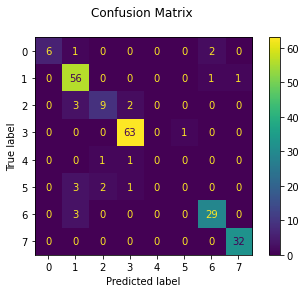

In [131]:
from sklearn import metrics
class_names = data_final1.columns
metrics.plot_confusion_matrix(grid_rf_best, x_test, y_test)
plt.title('Confusion Matrix \n')
plt.show()

# Saving Model

In [132]:
import pickle
pickle.dump(grid_rf_best, open("Power_Plant_Classification_model_primary_fuel", "wb"))
load_Power_Plant_Classification_model_primary_fuel= pickle.load(open("Power_Plant_Classification_model_primary_fuel", "rb"))


In [133]:
y_pred = load_Power_Plant_Classification_model_primary_fuel.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.head(8)

,Predicted Values,Actual Values
0,3,3
1,6,6
2,1,1
3,1,1
4,7,7
5,6,6
6,3,3
7,6,6


# Using different Classification ML Models for Target-2(Capacity_mw)

# Scaling Data

In [134]:
# Splitting data in target and dependent feature
data_final2.drop(['source'], axis =1, inplace= True)

x = data_final2.drop(['capacity_mw'], axis =1)  # for capacity_mw
y = data_final2['capacity_mw']

In [135]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

Find Best Random State

In [136]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_max=0
random_max=0
for i in range(1000,3000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)


Best accuracy is 0.6234282706745263 on Random_state 1636


In [137]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (648, 5)
Training target shape: (648,)
Test feature shape: (217, 5)
Test target shape: (217,)


The accuracy score is best at 1636 random state.

# Linear Regression

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=1636)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6234282706745263
Mean absolute error: 165.11172949434473
Mean square error: 57517.759844034925
Root mean square error: 239.8286051413278


Hyperparameter tuning

In [139]:
# Using GridsearchCV
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [140]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6234282706745263
Mean absolute error: 165.11172949434473
Mean square error: 57517.759844034925
Root mean square error: 239.8286051413278


Observation: R2 score not improved after using gridsearchCV.

# KNeighbors Regressor

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,20):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 336.39801039634216
RMSE value for k=  2 is: 300.56701257329456
RMSE value for k=  3 is: 289.0400045382146
RMSE value for k=  4 is: 271.3555795561086
RMSE value for k=  5 is: 255.28406943446083
RMSE value for k=  6 is: 254.6958516816223
RMSE value for k=  7 is: 244.79393219695015
RMSE value for k=  8 is: 244.28373322121897
RMSE value for k=  9 is: 242.81992755141638
RMSE value for k=  10 is: 242.15092510178317
RMSE value for k=  11 is: 238.66478266964234
RMSE value for k=  12 is: 237.53937074563655
RMSE value for k=  13 is: 241.4453895999883
RMSE value for k=  14 is: 244.49366701725705
RMSE value for k=  15 is: 245.87057553181637
RMSE value for k=  16 is: 250.0388576423677
RMSE value for k=  17 is: 249.158302469918
RMSE value for k=  18 is: 248.86039057836143
RMSE value for k=  19 is: 251.12397876575383
RMSE value for k=  20 is: 252.9303049772006


In [142]:
min(rmse_val)

237.53937074563655

 Best RSME value we get at K=12.

In [143]:
knn =KNeighborsRegressor(n_neighbors= 12)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6305829355015105
Mean absolute error: 144.09374039938555
Mean square error: 56424.95265423297
Root mean square error: 237.53937074563655


Hyperparameter tuning

In [144]:
# Using GridsearchCV
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'leaf_size' : [30,40,25,34], 'n_jobs':[1,-1],
             'n_neighbors' : [12],'weights': ['uniform', 'distance'], 'p':[1,2,3]}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 12, 'p': 2, 'weights': 'distance'}


In [145]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6332566864596685
Mean absolute error: 142.69710481629082
Mean square error: 56016.56255609799
Root mean square error: 236.67818352374178


Observation: There is no improvment after using gridsearchCV.

# AdaBoost Regressor

In [146]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.5363869968433748
Mean absolute error: 193.119778638471
Mean square error: 70812.4888288865
Root mean square error: 266.10616082474775


Hyperparameter tuning

In [147]:
# Using GridsearchCV
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.001,1,0.5] ,
        'n_estimators':[50,90,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.001, 'loss': 'square', 'n_estimators': 90}


In [148]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6143642529049697
Mean absolute error: 154.88664888471544
Mean square error: 58902.20258546235
Root mean square error: 242.69775974545448


Observation:
R2 score and RMSE improved after using gridsearchCV.

# Decision Tree Regressor

In [149]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.3310440521630019
Mean absolute error: 166.18705069124422
Mean square error: 102176.6759359447
Root mean square error: 319.6508656893403


Hyperparameter tuning

In [150]:
# Using GridsearchCV

param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'min_samples_split' : range(1,4),
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,4)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'squared_error', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}


In [151]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6142940380792304
Mean absolute error: 152.33055194057775
Mean square error: 58912.92723410125
Root mean square error: 242.71985339914255


Observation: There is improvement in R2 score and RMSE after using gridsearchCV.

# Random Forest Regressor

In [152]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6300053142461783
Mean absolute error: 145.23807171621058
Mean square error: 56513.17882220504
Root mean square error: 237.72500672458722


Hyperparameter tuning

In [153]:
# Using GridsearchCV

params = {'n_estimators' : [100,110,80], 'criterion' : ["squared_error", "absolute_error"], 
          'min_samples_split' : [3,2,1], 'n_jobs': [1,-1], 'min_samples_leaf' : [1,2,3]}

rf_grd = GridSearchCV(rf, param_grid = params)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'absolute_error', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 110, 'n_jobs': -1}


In [154]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.6667358193223258
Mean absolute error: 138.88791908253037
Mean square error: 50902.94256335415
Root mean square error: 225.61680470070075


Observation: R2 score and RMSE improved after using gridsearchCV.

# Support Vector Regression

In [155]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.08537433102926606
Mean absolute error: 210.0085858037114
Mean square error: 165780.63420970234


In [156]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))


R2 Score: 0.16899392201417052
Mean absolute error: 189.27100711715744
Mean square error: 126928.29625882638


In [157]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', )
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.4364194813974449
Mean absolute error: 162.895994880018
Mean square error: 86081.57861404707


Hyperparameter tuning

In [158]:
# Using GridsearchCV

params = {'gamma':['scale', 'auto'],'C':[1.0,10, 0.5,0.1], 'tol':[0.01,0.001,0.002], 'kernel':['linear']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 7)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.002}


In [159]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


R2 Score: 0.5535086162808955
Mean absolute error: 144.41850684513392
Mean square error: 68197.32385961947
Root mean square error: 261.14617335817786


Observation:
R2 score not improved after using gridsearchCV.

# Cross Validation

In [166]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , grid_knn_best , grid_rf_best , grid_svr_best , grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y,cv=5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [0.42625861 0.4197586  0.50706124 0.48573785 0.40430015]

Mean CV Score : 0.44862328943647006

Std deviation : 0.04022530336163319

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=3,
                      splitter='random')

 Cross Validation Score :  [0.23935438 0.51829592 0.6081196  0.49366061 0.45945319]

Mean CV Score : 0.4637767406163419

Std deviation : 0.12254332785798054

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_jobs=1, n_neighbors=12, weights='distance')

 Cross Validation Score :  [0.40198787 0.49214632 0.60767655 0.5439793  0.49549446]

Mean CV Score : 0.5082568995342374

Std deviation : 0.06764006689340665

-----------
-----------
Cross Validation Score of : RandomForestRegressor(criterion='absolute_error', min_samples_leaf=3,
                      n_estimators=110, n_jobs=-1)

 Cross Validation Score :  

Observation: Randomforest regressor is the best fit model.

In [167]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

#LASSO Regression
#best learning rate for LASSO
lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   
alpha  

3.7899959024319254

In [168]:
#RIDGE Regression
#best learning rate for RIDGE
ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   
alpha  

0.049100000000000005

In [169]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))


Score after applying LASSO regression on the model is : 0.6234170844710643


Observation: There is no big change in score after using LASSO and RIDGE, so we can say that model is not overfitted.

# Conclusion

# RandomforestRegressor is best fit model for this dataset to calculate capacity_mw

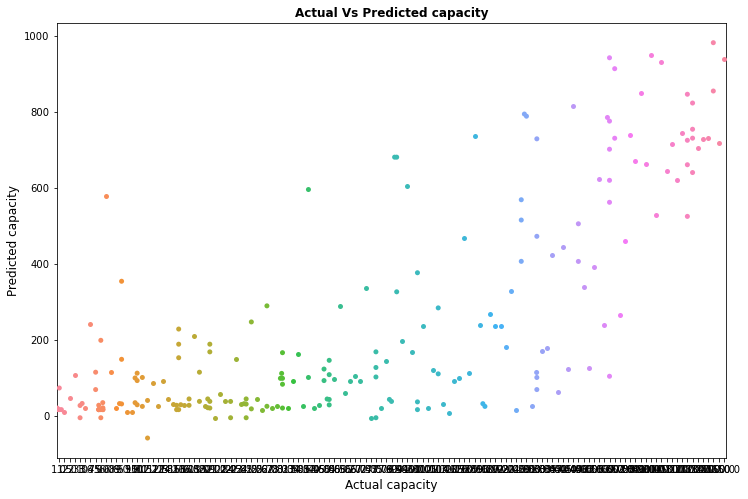

In [170]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(12,8))
sns.swarmplot(y_test.round(2), y_pred)
plt.xlabel("Actual capacity", fontsize= 12)
plt.ylabel("Predicted capacity",fontsize= 12)
plt.title("Actual Vs Predicted capacity" , fontsize= 12, fontweight= 'bold')
plt.show()

In [171]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))


Final R2 Score: 0.6263477842613385

Final Mean absolute error: 150.64114469534255

Final Mean square error: 57071.83183544955

Final Root mean square error: 238.8971155862907


# Saving Model

In [172]:
import pickle
pickle.dump(grid_rf_best, open("Power_Plant_Regression_model_capacity", "wb"))
load_Power_Plant_Regression_model_capacity= pickle.load(open("Power_Plant_Regression_model_capacity", "rb"))


In [173]:
y_pred = load_Power_Plant_Regression_model_capacity.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)


,Predicted Values,Actual Values
144,147.244091,160.0
201,19.949545,3.6
33,13.512727,5.0
148,890.886364,600.0
105,143.066864,105.7
85,12.045000,2.1
